In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Uploading the Dataset

In [2]:
rta=pd.read_csv(r"D:\NANA\DATA_ANALYSIS\projects\RTA\RTA Dataset.csv")
rta.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7389,21:51:00,Friday,18-30,Male,Above high school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,...,Other,Pedestrian,Male,31-50,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
8884,15:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Reversing,Pedestrian,Female,Under 18,3,Driver,Normal,Crossing from offside - masked by parked or s...,Changing lane to the left,Slight Injury
10334,10:16:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
8123,12:59:00,Tuesday,Over 51,Male,Junior high school,Employee,Below 1yr,Lorry (11?40Q),Governmental,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
1298,15:00:00,Thursday,Unknown,Female,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Other,Slight Injury
8591,9:07:00,Saturday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (11?40Q),Governmental,1-2yr,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9493,9:10:00,Thursday,31-50,Male,Junior high school,Employee,1-2yr,Special vehicle,Governmental,Below 1yr,...,Going straight,Driver or rider,Female,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
9210,17:20:00,Tuesday,31-50,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
3275,17:00:00,Tuesday,Unknown,Male,High school,Employee,1-2yr,Public (13?45 seats),Owner,Unknown,...,Getting off,Driver or rider,Male,Under 18,3,Employee,Normal,Not a Pedestrian,No distancing,Slight Injury
8165,19:30:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,2-5yrs,...,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,Overtaking,Slight Injury


# Metadata of the dataset

In [3]:
rta.shape

(12316, 32)

In [4]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
rta.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [6]:
print(f"Number of object columns: {(rta.dtypes == 'object').sum()}")
print(f"Number of integer columns: {(rta.dtypes == 'int64').sum()}")

Number of object columns: 30
Number of integer columns: 2


In [7]:
print(f'Number of duplicate rows: {rta.duplicated().sum()}')


Number of duplicate rows: 0


In [8]:
rta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
rta.describe(include = 'object').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


# retreving the hour column from the time column

In [10]:
rta['Hour_of_day'] = pd.to_datetime(rta['Time']).dt.hour
rta = rta.drop(columns='Time')
rta.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [11]:
print(f"Number of object columns: {(rta.dtypes == 'object').sum()}")
print(f"Number of integer columns: {(rta.dtypes == 'int64').sum()}")

Number of object columns: 29
Number of integer columns: 3


# Finding the missing values of each column

In [12]:
print("the total of missing values for each column")
rta.isnull().sum().sort_values(ascending=False)

the total of missing values for each column


Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Sex_of_driver                     0
Age_band_of_driver                0
Hour_of_day                       0
Road_surface_conditions           0
Accident_severity                 0
Light_conditions                  0
Weather_conditions                0
Number_of_vehicles_involved       0
Number_of_casualties              0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty        

In [13]:
# Calculate total number of missing values
total_missing = rta.isnull().sum().sum()

# Calculate number of columns with missing values
num_cols_with_missing = rta.isnull().any().sum()

# Calculate number of columns without missing values
num_cols_without_missing = rta.shape[1] - num_cols_with_missing

# Calculate number of rows with missing values
num_rows_with_missing = rta.isnull().any(axis=1).sum()

# Print results
print(f"Total number of missing values: {total_missing}")
print(f"Number of columns with missing values: {num_cols_with_missing}")
print(f"Number of columns without missing values: {num_cols_without_missing}")
print(f"Number of rows with missing values: {num_rows_with_missing}")


Total number of missing values: 20057
Number of columns with missing values: 16
Number of columns without missing values: 16
Number of rows with missing values: 9427


In [14]:
#the percentage of missing values for each column # it is ok to replace rta.shape[0] to len(rta) if u want
missing_percentage = (rta.isnull().sum() / rta.shape[0] * 100).sort_values(ascending=False)
print("the percentage of missing values for each column")
print(missing_percentage)


the percentage of missing values for each column
Defect_of_vehicle              35.945112
Service_year_of_vehicle        31.893472
Work_of_casuality              25.966223
Fitness_of_casuality           21.394933
Type_of_vehicle                 7.713543
Types_of_Junction               7.202014
Driving_experience              6.731082
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Owner_of_vehicle                3.913608
Lanes_or_Medians                3.126015
Vehicle_movement                2.500812
Area_accident_occured           1.940565
Road_surface_type               1.396557
Type_of_collision               1.258525
Road_allignment                 1.152972
Sex_of_driver                   0.000000
Age_band_of_driver              0.000000
Hour_of_day                     0.000000
Road_surface_conditions         0.000000
Accident_severity               0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Number_o

# Missing value Treatment

In [15]:
rta.replace('na', np.nan, inplace=True)
rta['Driving_experience'].replace('unknown','Unknown',inplace=True)
rta['Light_conditions'].replace('Darkness - lights unlit','Darkness - no lighting',inplace=True)
rta['Road_surface_type'].replace('Asphalt roads with some distress','Asphalt roads',inplace=True)
rta['Fitness_of_casuality'].replace('NormalNormal','Normal',inplace=True)


rta.sample(10)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
2770,Friday,Unknown,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,NaN,NaN,...,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury,17
11859,Thursday,Unknown,Male,Elementary school,Employee,5-10yr,Public (13?45 seats),Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury,15
1635,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,5-10yrs,No defect,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,15
6219,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Above 10yr,No defect,...,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury,9
8683,Monday,18-30,Male,Elementary school,Employee,Below 1yr,Automobile,Governmental,Below 1yr,No defect,...,NaN,NaN,NaN,NaN,Driver,NaN,Not a Pedestrian,Driving to the left,Slight Injury,21
5139,Thursday,Unknown,Male,NaN,Employee,2-5yr,Automobile,Owner,Above 10yr,No defect,...,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
6945,Wednesday,Over 51,Male,High school,Owner,Above 10yr,NaN,Owner,2-5yrs,No defect,...,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury,8
9509,Wednesday,Under 18,Female,Junior high school,Employee,2-5yr,Automobile,Owner,Above 10yr,No defect,...,Driver or rider,Female,18-30,3,Employee,Normal,Not a Pedestrian,Moving Backward,Slight Injury,7
5779,Monday,Over 51,Male,High school,Employee,2-5yr,Public (> 45 seats),Owner,Unknown,No defect,...,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Other,Slight Injury,15
2312,Wednesday,Unknown,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,NaN,...,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury,21


In [16]:
# Loop through columns with object datatype and replace missing values with 'unknown'
for col in rta.select_dtypes(include='object').columns:
    rta[col].fillna('Unknown', inplace=True)

# Verify the changes
rta.sample(10)


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
4305,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,1-2yr,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Driving carelessly,Slight Injury,13
11012,Sunday,31-50,Male,Unknown,Owner,Above 10yr,Automobile,Owner,Unknown,No defect,...,Unknown,Unknown,Unknown,Unknown,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,9
4236,Friday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,5-10yrs,No defect,...,Unknown,Unknown,Unknown,Unknown,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury,21
11174,Wednesday,Over 51,Male,Elementary school,Owner,Above 10yr,Lorry (11?40Q),Owner,Above 10yr,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,No distancing,Slight Injury,8
8072,Saturday,18-30,Male,Junior high school,Employee,1-2yr,Unknown,Owner,5-10yrs,Unknown,...,Driver or rider,Male,Under 18,2,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Serious Injury,16
6512,Saturday,Unknown,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,Unknown,Unknown,...,Pedestrian,Male,31-50,3,Self-employed,Normal,"In carriageway, statioNot a Pedestrianry - not...",Changing lane to the right,Slight Injury,22
8161,Sunday,Under 18,Male,Above high school,Employee,No Licence,Lorry (11?40Q),Owner,5-10yrs,5,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,No distancing,Slight Injury,13
3091,Tuesday,31-50,Male,Junior high school,Unknown,1-2yr,Automobile,Owner,5-10yrs,No defect,...,Unknown,Unknown,Unknown,Unknown,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,16
8783,Tuesday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Above 10yr,No defect,...,Pedestrian,Male,Over 51,3,Unknown,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury,16
4196,Tuesday,18-30,Male,Junior high school,Employee,Unknown,Public (12 seats),Owner,Unknown,No defect,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Driving carelessly,Slight Injury,13


In [17]:
# Loop through columns with integer datatype and replace missing values with the mode of the column
#the missing values are littlie in these columns
for col in rta.select_dtypes(include='int64').columns:
    rta[col].fillna(rta[col].mode(), inplace=True)

# Verify the changes
rta.sample(10)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
1863,Wednesday,Unknown,Male,Elementary school,Employee,5-10yr,Unknown,Owner,Unknown,No defect,...,Driver or rider,Female,31-50,3,Unknown,Unknown,Not a Pedestrian,No priority to vehicle,Slight Injury,14
6829,Wednesday,31-50,Male,High school,Employee,5-10yr,Lorry (11?40Q),Owner,Unknown,No defect,...,Unknown,Unknown,Unknown,Unknown,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,16
3239,Friday,31-50,Male,Junior high school,Owner,2-5yr,Other,Owner,5-10yrs,Unknown,...,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,8
8697,Wednesday,Under 18,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,Unknown,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury,21
4700,Friday,Unknown,Female,High school,Employee,Above 10yr,Public (13?45 seats),Owner,Unknown,No defect,...,Passenger,Female,Over 51,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury,3
499,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,13
5740,Sunday,Under 18,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Above 10yr,No defect,...,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury,20
9148,Tuesday,31-50,Male,Elementary school,Owner,5-10yr,Automobile,Owner,5-10yrs,No defect,...,Unknown,Unknown,Unknown,Unknown,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury,17
7128,Thursday,31-50,Male,High school,Employee,5-10yr,Automobile,Owner,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,18
4281,Friday,Over 51,Male,Junior high school,Employee,Above 10yr,Unknown,Owner,2-5yrs,Unknown,...,Unknown,Unknown,Unknown,Unknown,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,14


In [18]:
rta.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [19]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [20]:
print("Unqiue values per column:")
rta.nunique()

Unqiue values per column:


Day_of_week                     7
Age_band_of_driver              5
Sex_of_driver                   3
Educational_level               7
Vehicle_driver_relation         4
Driving_experience              7
Type_of_vehicle                18
Owner_of_vehicle                5
Service_year_of_vehicle         6
Defect_of_vehicle               4
Area_accident_occured          14
Lanes_or_Medians                7
Road_allignment                10
Types_of_Junction               8
Road_surface_type               5
Road_surface_conditions         4
Light_conditions                3
Weather_conditions              9
Type_of_collision              10
Number_of_vehicles_involved     6
Number_of_casualties            8
Vehicle_movement               13
Casualty_class                  4
Sex_of_casualty                 3
Age_band_of_casualty            6
Casualty_severity               4
Work_of_casuality               7
Fitness_of_casuality            5
Pedestrian_movement             9
Cause_of_accid

# EDA and Visualization

the distribution of the target variable 

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


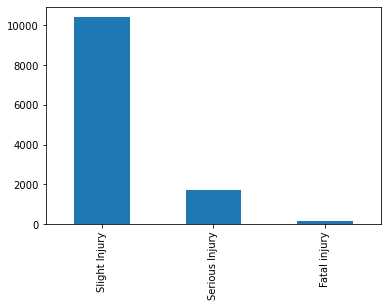

In [21]:
# target variable classes counts and bar plot
print("the distribution of the target variable \n")
print(rta['Accident_severity'].value_counts())
rta['Accident_severity'].value_counts().plot(kind='bar')

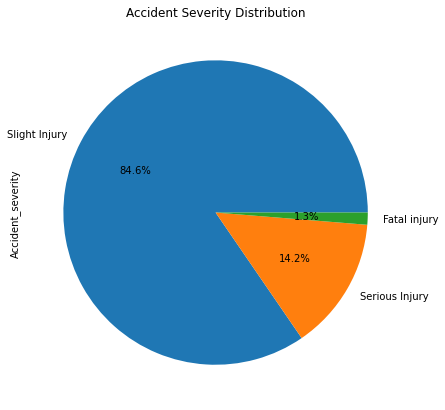

In [22]:
#Accident_severity counts as a pie chart with percentages as labels


# Calculate the value counts for the target variable
severity_counts = rta['Accident_severity'].value_counts()

# Plot a pie chart with percentages as labels
plt.figure(figsize=(20, 7))
severity_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the title and show the plot
plt.title('Accident Severity Distribution')
plt.show()


# Count plot of all object columns

Distribution of 'Day_of_week' (in %):
Friday       16.57%
Thursday     15.03%
Wednesday    14.94%
Tuesday      14.37%
Monday       13.65%
Saturday     13.53%
Sunday       11.91%
Name: Day_of_week, dtype: object
----------------------------------------------------------------------------


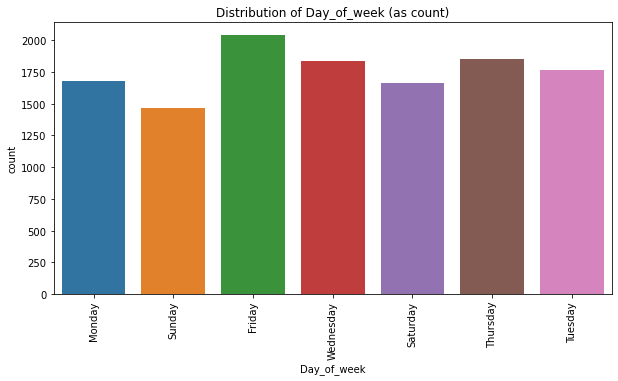

----------------------------------------------------------------------------
Distribution of 'Age_band_of_driver' (in %):
18-30       34.68%
31-50       33.18%
Over 51     12.87%
Unknown     12.57%
Under 18     6.70%
Name: Age_band_of_driver, dtype: object
----------------------------------------------------------------------------


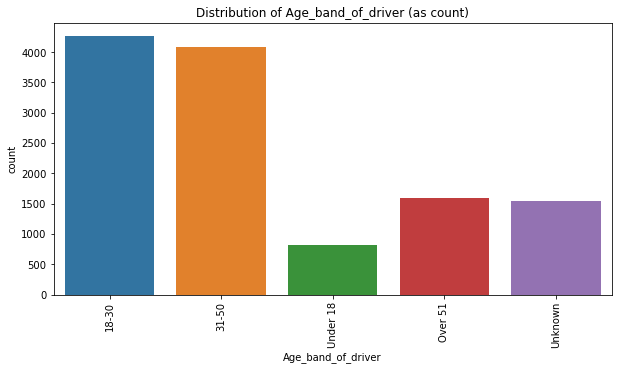

----------------------------------------------------------------------------
Distribution of 'Sex_of_driver' (in %):
Male       92.86%
Female      5.69%
Unknown     1.45%
Name: Sex_of_driver, dtype: object
----------------------------------------------------------------------------


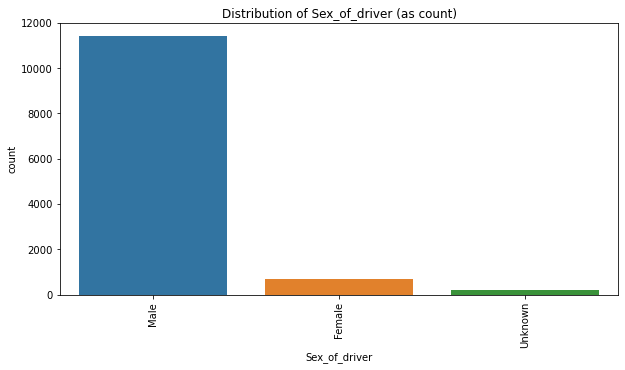

----------------------------------------------------------------------------
Distribution of 'Educational_level' (in %):
Junior high school    61.86%
Elementary school     17.56%
High school            9.01%
Unknown                6.83%
Above high school      2.94%
Writing & reading      1.43%
Illiterate             0.37%
Name: Educational_level, dtype: object
----------------------------------------------------------------------------


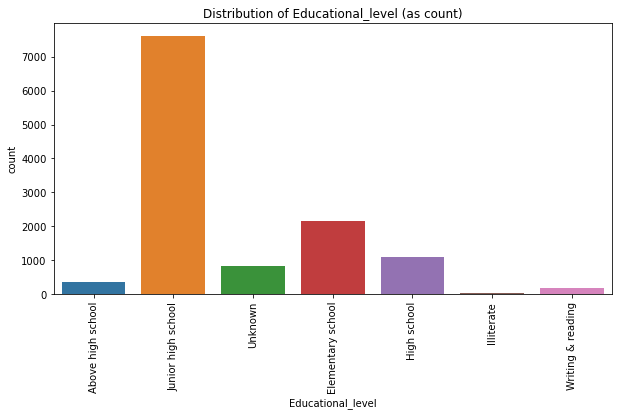

----------------------------------------------------------------------------
Distribution of 'Vehicle_driver_relation' (in %):
Employee    78.17%
Owner       16.02%
Unknown      4.81%
Other        1.00%
Name: Vehicle_driver_relation, dtype: object
----------------------------------------------------------------------------


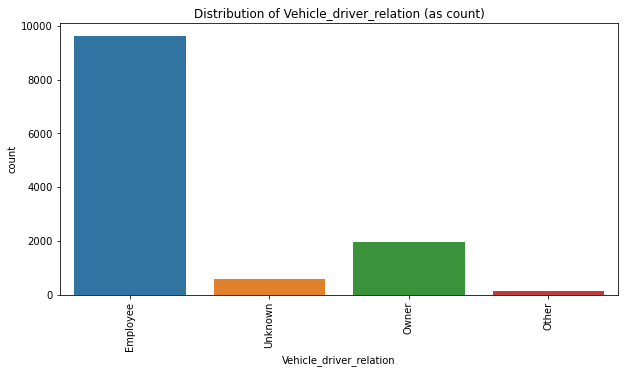

----------------------------------------------------------------------------
Distribution of 'Driving_experience' (in %):
5-10yr        27.31%
2-5yr         21.22%
Above 10yr    18.37%
1-2yr         14.26%
Below 1yr     10.90%
Unknown        7.00%
No Licence     0.96%
Name: Driving_experience, dtype: object
----------------------------------------------------------------------------


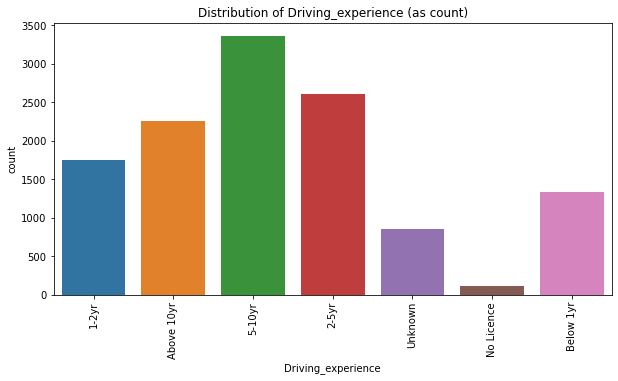

----------------------------------------------------------------------------
Distribution of 'Type_of_vehicle' (in %):
Automobile              26.02%
Lorry (41?100Q)         17.75%
Other                    9.81%
Unknown                  7.71%
Pick up upto 10Q         6.58%
Public (12 seats)        5.77%
Stationwagen             5.58%
Lorry (11?40Q)           4.39%
Public (13?45 seats)     4.32%
Public (> 45 seats)      3.28%
Long lorry               3.11%
Taxi                     2.15%
Motorcycle               1.44%
Special vehicle          0.68%
Ridden horse             0.62%
Turbo                    0.37%
Bajaj                    0.24%
Bicycle                  0.17%
Name: Type_of_vehicle, dtype: object
----------------------------------------------------------------------------


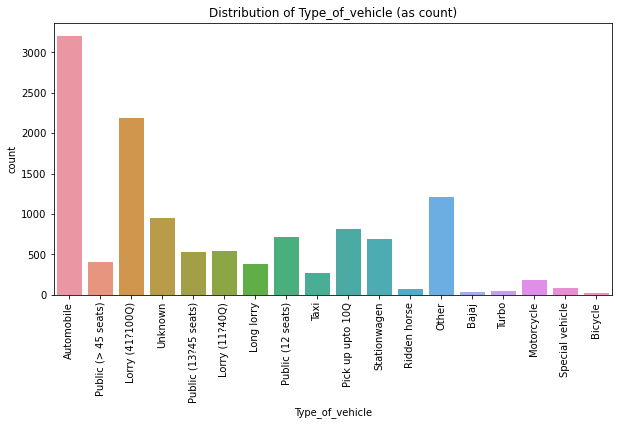

----------------------------------------------------------------------------
Distribution of 'Owner_of_vehicle' (in %):
Owner           84.92%
Governmental     8.45%
Unknown          3.91%
Organization     2.53%
Other            0.18%
Name: Owner_of_vehicle, dtype: object
----------------------------------------------------------------------------


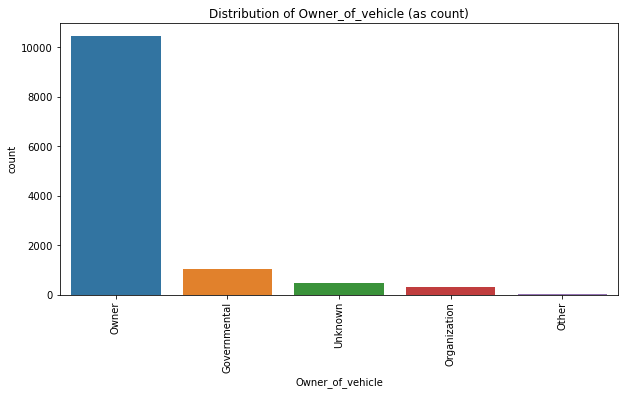

----------------------------------------------------------------------------
Distribution of 'Service_year_of_vehicle' (in %):
Unknown       55.30%
2-5yrs        14.55%
Above 10yr    10.75%
5-10yrs       10.39%
1-2yr          6.71%
Below 1yr      2.29%
Name: Service_year_of_vehicle, dtype: object
----------------------------------------------------------------------------


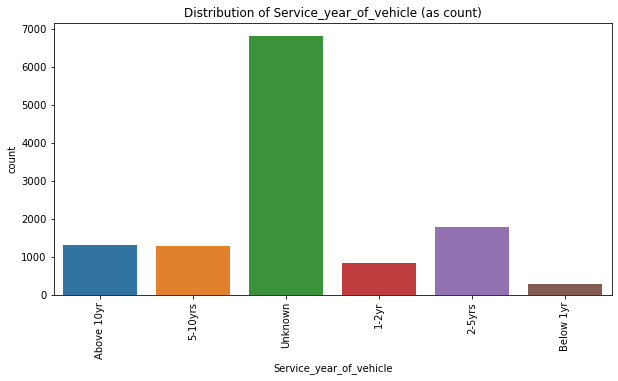

----------------------------------------------------------------------------
Distribution of 'Defect_of_vehicle' (in %):
No defect    63.15%
Unknown      35.95%
7             0.62%
5             0.29%
Name: Defect_of_vehicle, dtype: object
----------------------------------------------------------------------------


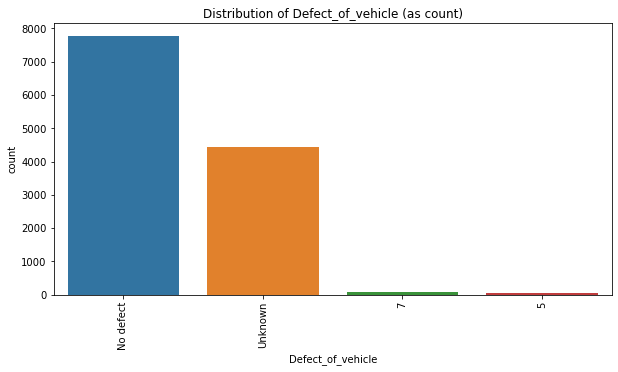

----------------------------------------------------------------------------
Distribution of 'Area_accident_occured' (in %):
Other                              31.01%
Office areas                       28.02%
Residential areas                  16.73%
 Church areas                       8.61%
 Industrial areas                   3.70%
School areas                        3.37%
  Recreational areas                2.66%
Unknown                             2.12%
 Outside rural areas                1.77%
 Hospital areas                     0.98%
  Market areas                      0.51%
Rural village areas                 0.36%
Rural village areasOffice areas     0.16%
Recreational areas                  0.01%
Name: Area_accident_occured, dtype: object
----------------------------------------------------------------------------


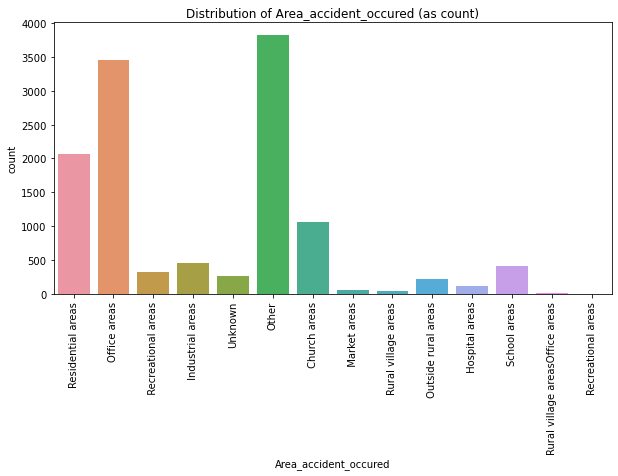

----------------------------------------------------------------------------
Distribution of 'Lanes_or_Medians' (in %):
Two-way (divided with broken lines road marking)    35.82%
Undivided Two way                                   30.82%
other                                               13.48%
Double carriageway (median)                          8.28%
One way                                              6.86%
Unknown                                              3.59%
Two-way (divided with solid lines road marking)      1.15%
Name: Lanes_or_Medians, dtype: object
----------------------------------------------------------------------------


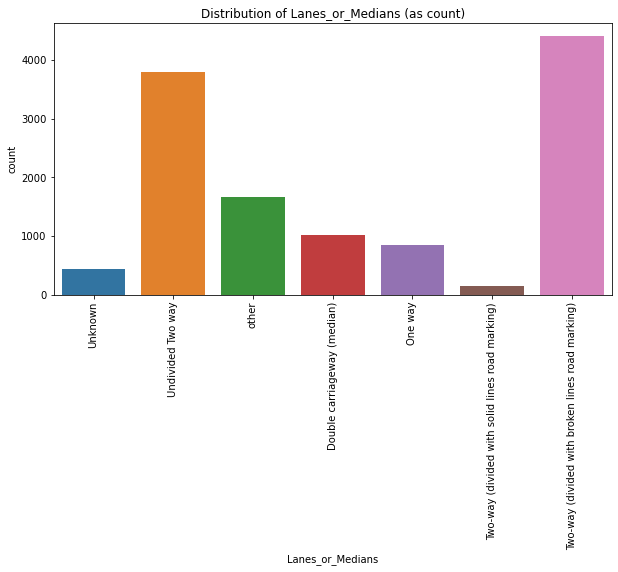

----------------------------------------------------------------------------
Distribution of 'Road_allignment' (in %):
Tangent road with flat terrain                   84.92%
Tangent road with mild grade and flat terrain     4.07%
Steep grade downward with mountainous terrain     3.48%
Tangent road with mountainous terrain and         3.22%
Gentle horizontal curve                           1.32%
Unknown                                           1.15%
Escarpments                                       0.92%
Sharp reverse curve                               0.46%
Tangent road with rolling terrain                 0.30%
Steep grade upward with mountainous terrain       0.15%
Name: Road_allignment, dtype: object
----------------------------------------------------------------------------


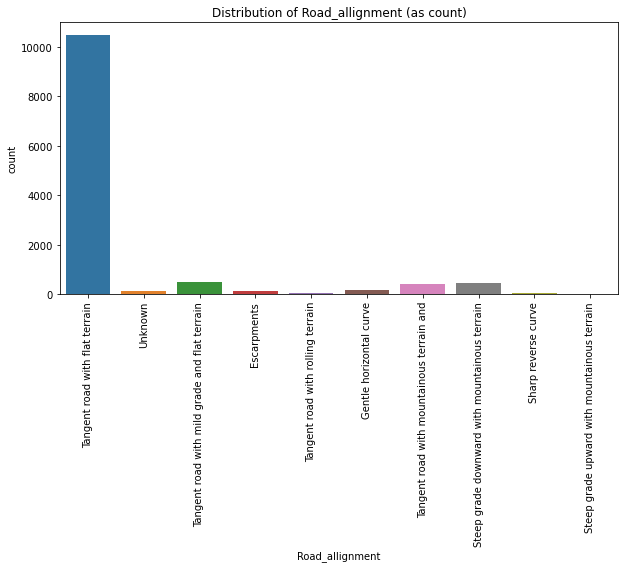

----------------------------------------------------------------------------
Distribution of 'Types_of_Junction' (in %):
Y Shape        36.89%
No junction    31.15%
Crossing       17.68%
Unknown         8.75%
Other           3.61%
O Shape         1.33%
T Shape         0.49%
X Shape         0.10%
Name: Types_of_Junction, dtype: object
----------------------------------------------------------------------------


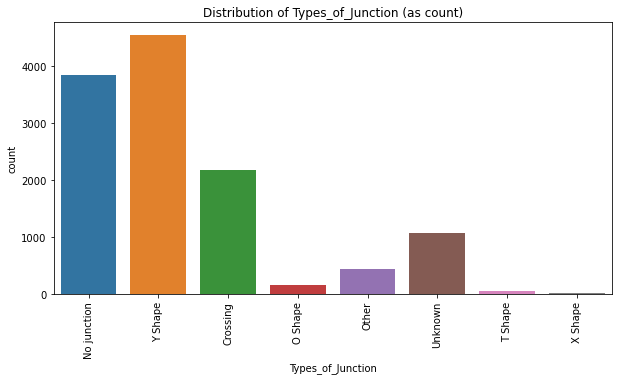

----------------------------------------------------------------------------
Distribution of 'Road_surface_type' (in %):
Asphalt roads    92.38%
Earth roads       2.91%
Gravel roads      1.96%
Unknown           1.40%
Other             1.36%
Name: Road_surface_type, dtype: object
----------------------------------------------------------------------------


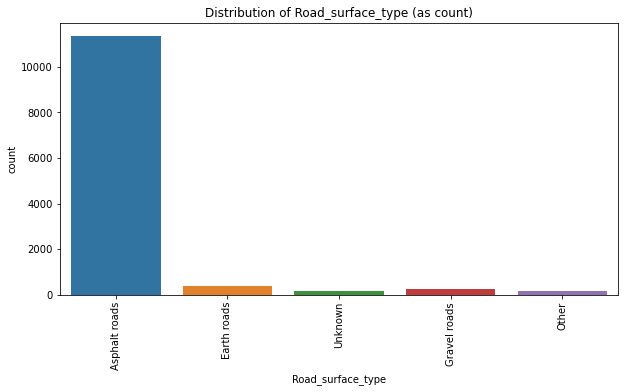

----------------------------------------------------------------------------
Distribution of 'Road_surface_conditions' (in %):
Dry                     75.84%
Wet or damp             23.58%
Snow                     0.57%
Flood over 3cm. deep     0.02%
Name: Road_surface_conditions, dtype: object
----------------------------------------------------------------------------


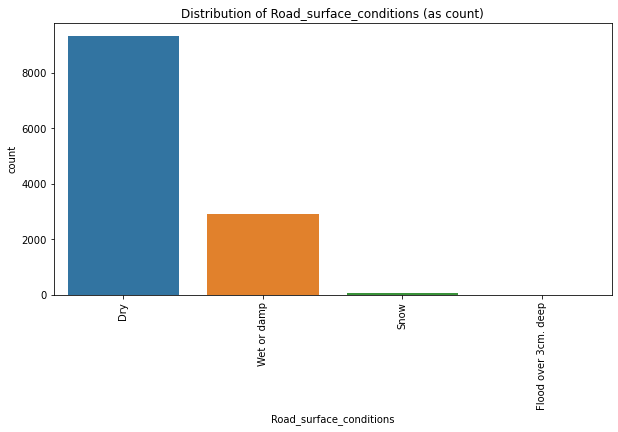

----------------------------------------------------------------------------
Distribution of 'Light_conditions' (in %):
Daylight                  71.44%
Darkness - lights lit     26.68%
Darkness - no lighting     1.88%
Name: Light_conditions, dtype: object
----------------------------------------------------------------------------


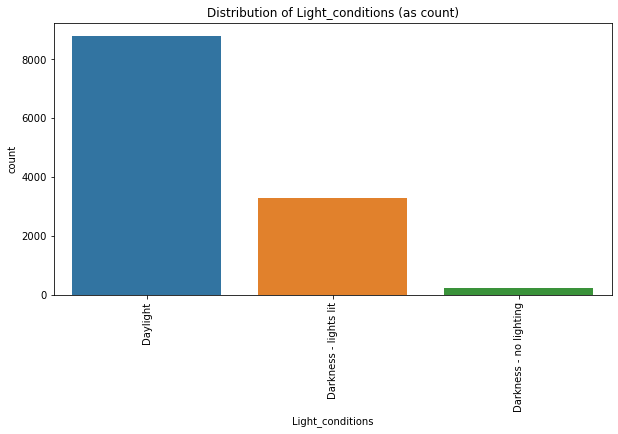

----------------------------------------------------------------------------
Distribution of 'Weather_conditions' (in %):
Normal               81.71%
Raining              10.81%
Other                 2.40%
Unknown               2.37%
Cloudy                1.01%
Windy                 0.80%
Snow                  0.50%
Raining and Windy     0.32%
Fog or mist           0.08%
Name: Weather_conditions, dtype: object
----------------------------------------------------------------------------


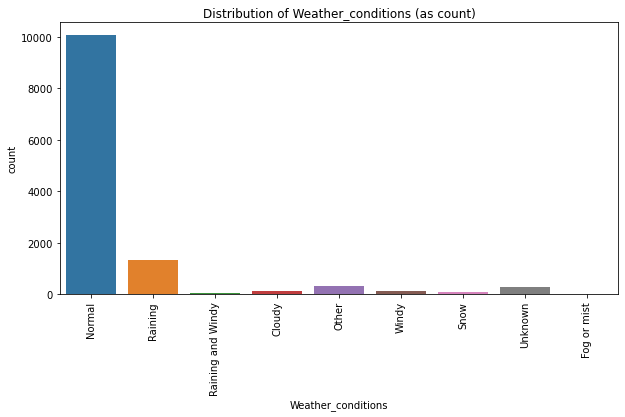

----------------------------------------------------------------------------
Distribution of 'Type_of_collision' (in %):
Vehicle with vehicle collision             71.24%
Collision with roadside objects            14.50%
Collision with pedestrians                  7.28%
Rollover                                    3.22%
Collision with animals                      1.39%
Unknown                                     1.37%
Collision with roadside-parked vehicles     0.44%
Fall from vehicles                          0.28%
Other                                       0.21%
With Train                                  0.07%
Name: Type_of_collision, dtype: object
----------------------------------------------------------------------------


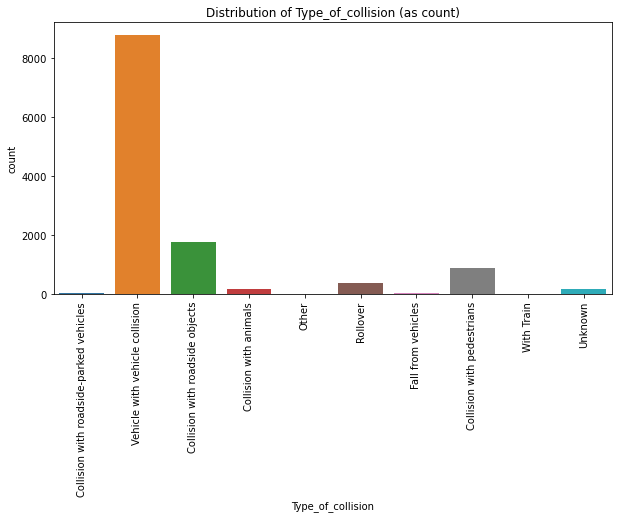

----------------------------------------------------------------------------
Distribution of 'Vehicle_movement' (in %):
Going straight         66.24%
Moving Backward         8.00%
Other                   7.61%
Reversing               4.57%
Turnover                3.97%
Unknown                 3.22%
Getting off             2.75%
Entering a junction     1.57%
Overtaking              0.78%
Stopping                0.50%
U-Turn                  0.41%
Waiting to go           0.32%
Parked                  0.08%
Name: Vehicle_movement, dtype: object
----------------------------------------------------------------------------


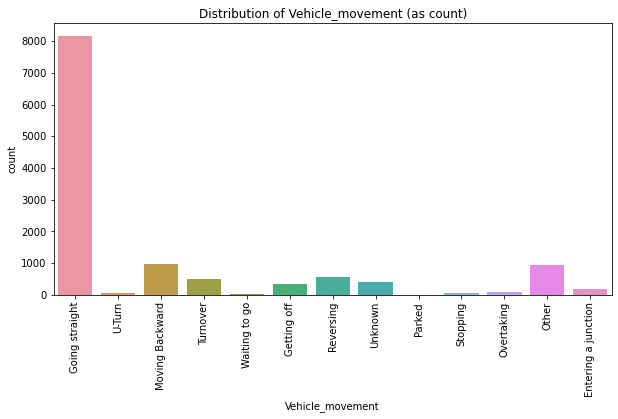

----------------------------------------------------------------------------
Distribution of 'Casualty_class' (in %):
Driver or rider    40.14%
Unknown            36.08%
Pedestrian         13.39%
Passenger          10.39%
Name: Casualty_class, dtype: object
----------------------------------------------------------------------------


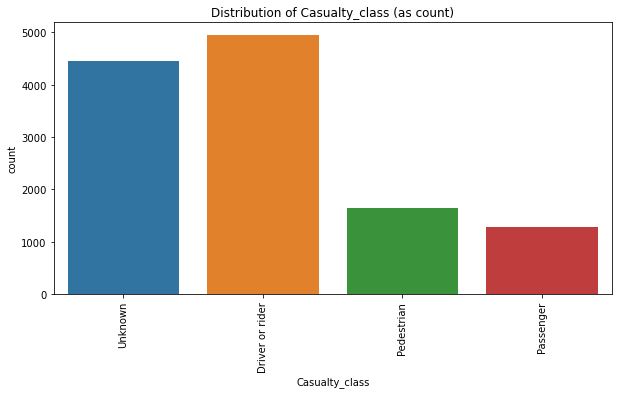

----------------------------------------------------------------------------
Distribution of 'Sex_of_casualty' (in %):
Male       42.65%
Unknown    36.08%
Female     21.27%
Name: Sex_of_casualty, dtype: object
----------------------------------------------------------------------------


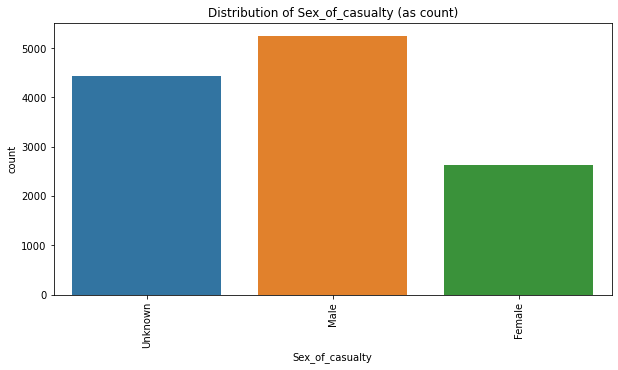

----------------------------------------------------------------------------
Distribution of 'Age_band_of_casualty' (in %):
Unknown     36.08%
18-30       25.54%
31-50       19.93%
Under 18     8.40%
Over 51      8.07%
5            1.98%
Name: Age_band_of_casualty, dtype: object
----------------------------------------------------------------------------


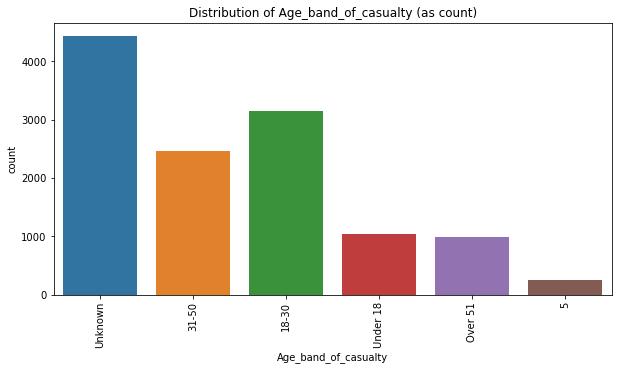

----------------------------------------------------------------------------
Distribution of 'Casualty_severity' (in %):
3          57.45%
Unknown    36.08%
2           6.26%
1           0.21%
Name: Casualty_severity, dtype: object
----------------------------------------------------------------------------


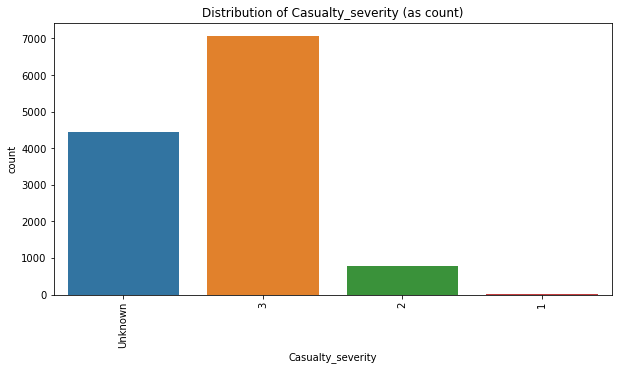

----------------------------------------------------------------------------
Distribution of 'Work_of_casuality' (in %):
Driver           47.93%
Unknown          26.12%
Self-employed    16.60%
Employee          4.49%
Other             3.76%
Student           0.84%
Unemployed        0.27%
Name: Work_of_casuality, dtype: object
----------------------------------------------------------------------------


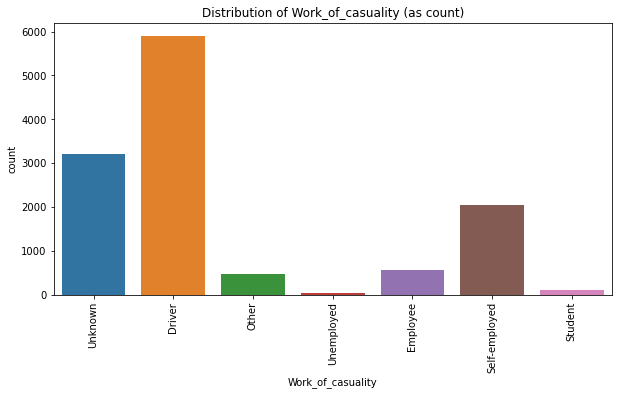

----------------------------------------------------------------------------
Distribution of 'Fitness_of_casuality' (in %):
Normal     78.17%
Unknown    21.39%
Blind       0.15%
Deaf        0.15%
Other       0.15%
Name: Fitness_of_casuality, dtype: object
----------------------------------------------------------------------------


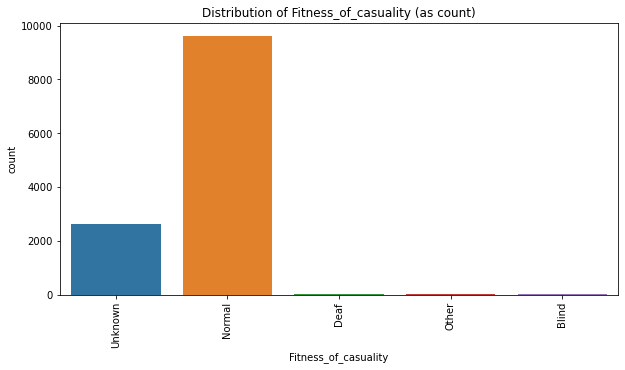

----------------------------------------------------------------------------
Distribution of 'Pedestrian_movement' (in %):
Not a Pedestrian                                                                                                                         92.48%
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                             2.74%
Unknown or other                                                                                                                          2.38%
Crossing from driver's nearside                                                                                                           1.14%
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                             0.58%
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                            0.37%
Walking along

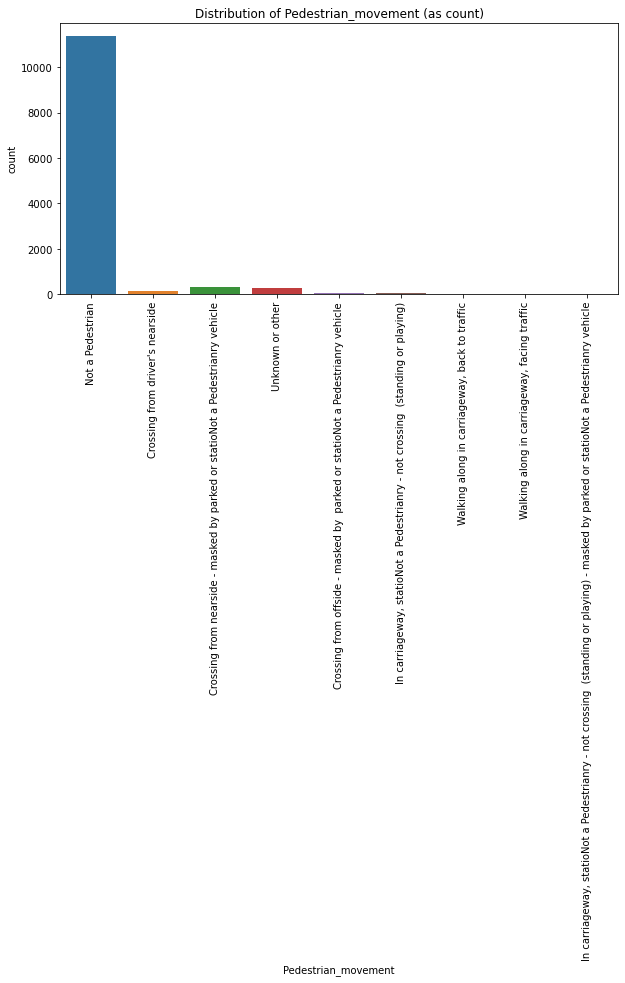

----------------------------------------------------------------------------
Distribution of 'Cause_of_accident' (in %):
No distancing                           18.37%
Changing lane to the right              14.68%
Changing lane to the left               11.96%
Driving carelessly                      11.38%
No priority to vehicle                   9.80%
Moving Backward                          9.23%
No priority to pedestrian                5.85%
Other                                    3.70%
Overtaking                               3.49%
Driving under the influence of drugs     2.76%
Driving to the left                      2.31%
Getting off the vehicle improperly       1.60%
Driving at high speed                    1.41%
Overturning                              1.21%
Turnover                                 0.63%
Overspeed                                0.50%
Overloading                              0.48%
Drunk driving                            0.22%
Improper parking                 

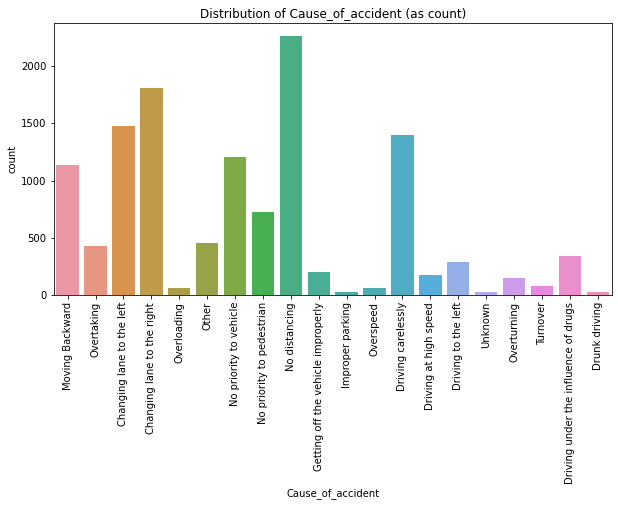

----------------------------------------------------------------------------
Distribution of 'Accident_severity' (in %):
Slight Injury     84.56%
Serious Injury    14.15%
Fatal injury       1.28%
Name: Accident_severity, dtype: object
----------------------------------------------------------------------------


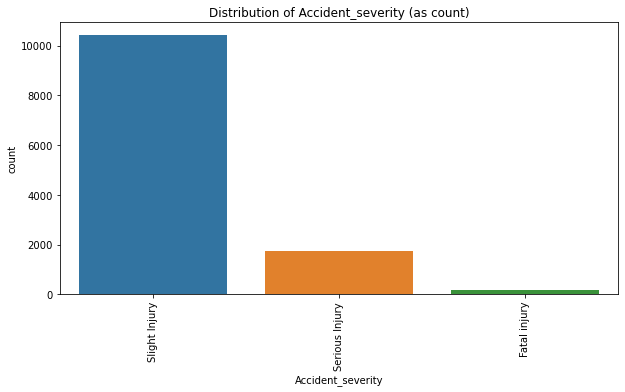

----------------------------------------------------------------------------


In [23]:
def analyze_categorical_columns(dataframe):
    # Select categorical columns
    categorical_columns = dataframe.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        # Calculate value counts as percentages
        value_counts = dataframe[col].value_counts(normalize=True) * 100

        # Print value counts as percentages
        print(f"Distribution of '{col}' (in %):")
        print(value_counts.apply(lambda x: f"{x:,.2f}%"))
        
        print("----------------------------------------------------------------------------")

        # Plot the count plot (not percentage-based)
        plt.figure(figsize=(10, 5))
        sns.countplot(data=dataframe, x=col)
        plt.title(f'Distribution of {col} (as count)')
        plt.xticks(rotation=90)
        plt.show()

        print("----------------------------------------------------------------------------")

# Example call to the function (replace 'rta' with your actual DataFrame)
analyze_categorical_columns(rta)


# analysing numeric columns

Description of: Number_of_vehicles_involved
count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: Number_of_vehicles_involved, dtype: float64
----------------------------------------------------------------------------
Distribution of: Number_of_vehicles_involved


D:\FCAI\ANACONDA\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


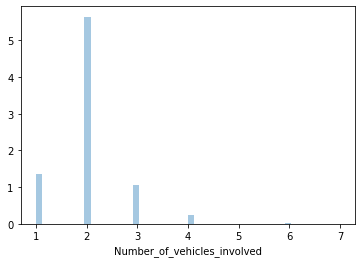

----------------------------------------------------------------------------
BoxPlot of of: Number_of_vehicles_involved


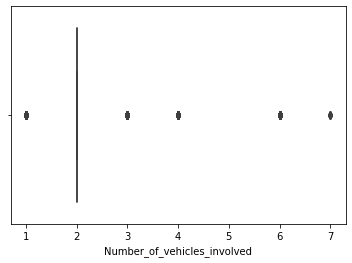

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Description of: Number_of_casualties
count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64
----------------------------------------------------------------------------
Distribution of: Number_of_casualties


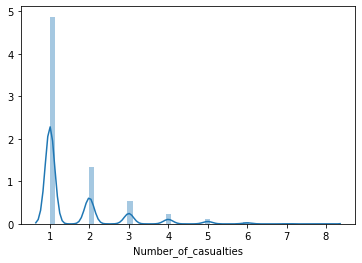

----------------------------------------------------------------------------
BoxPlot of of: Number_of_casualties


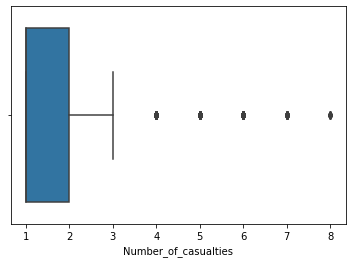

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Description of: Hour_of_day
count    12316.000000
mean        13.835823
std          5.202923
min          0.000000
25%         10.000000
50%         15.000000
75%         18.000000
max         23.000000
Name: Hour_of_day, dtype: float64
----------------------------------------------------------------------------
Distribution of: Hour_of_day


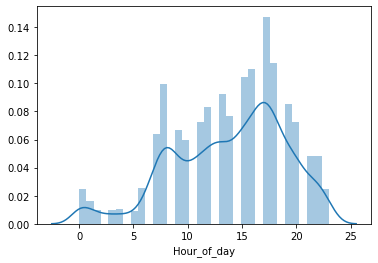

----------------------------------------------------------------------------
BoxPlot of of: Hour_of_day


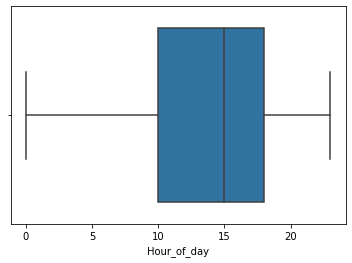

----------------------------------------------------------------------------
----------------------------------------------------------------------------


In [24]:
def describe_and_plot(dataframe):
    numerical_columns = rta.select_dtypes(include=['int64']).columns
    
    for col in numerical_columns:
        print(f"Description of: {col}")
        print(rta[col].describe())
        print("----------------------------------------------------------------------------")
        
        plt.figure()
        print(f"Distribution of: {col}")
        sns.distplot(rta[col], kde=True);
        plt.show()
        print("----------------------------------------------------------------------------")
        
        plt.figure()
        print(f"BoxPlot of of: {col}")
        sns.boxplot(x=rta[col])
        plt.show()
        
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        
#calling the function
describe_and_plot(rta)

# visualize each feature column across accident severity

<Figure size 1080x720 with 0 Axes>

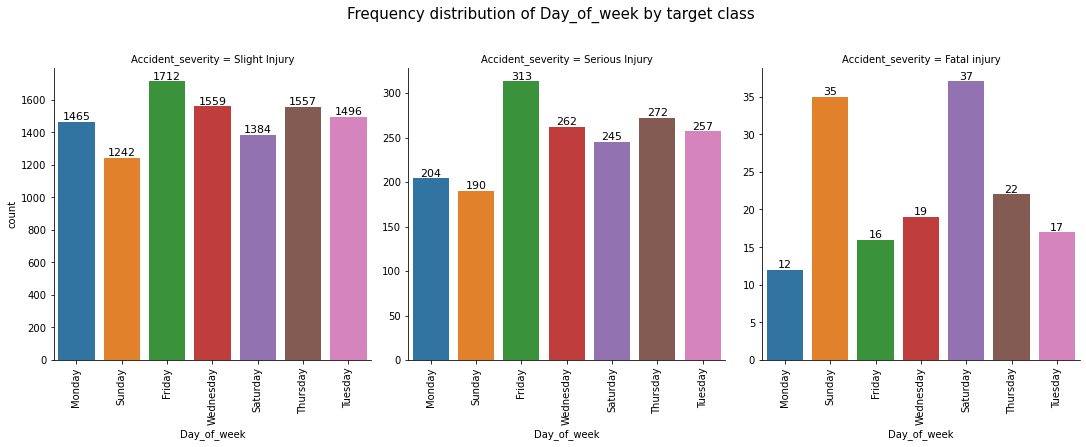

<Figure size 1080x720 with 0 Axes>

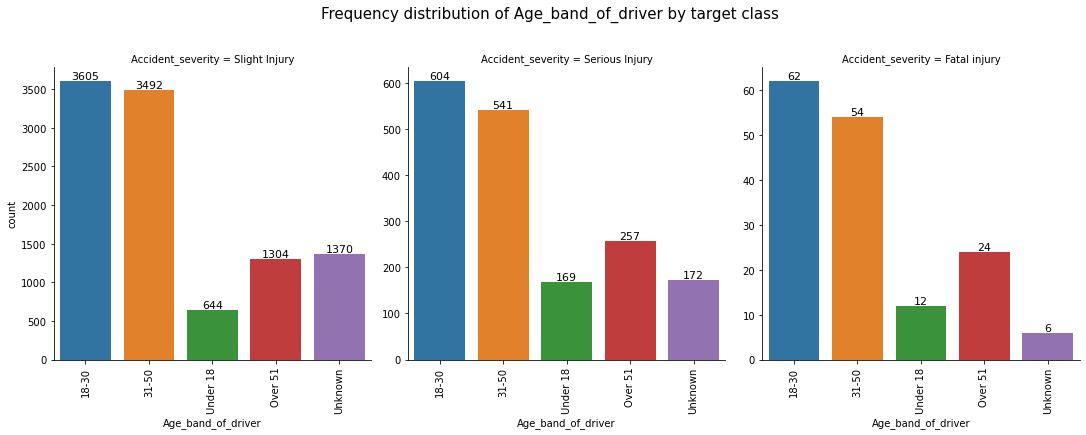

<Figure size 1080x720 with 0 Axes>

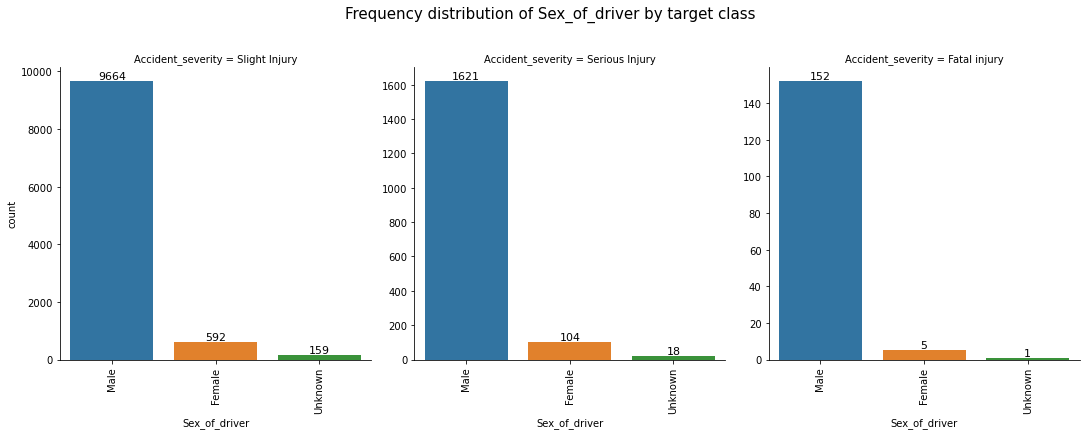

<Figure size 1080x720 with 0 Axes>

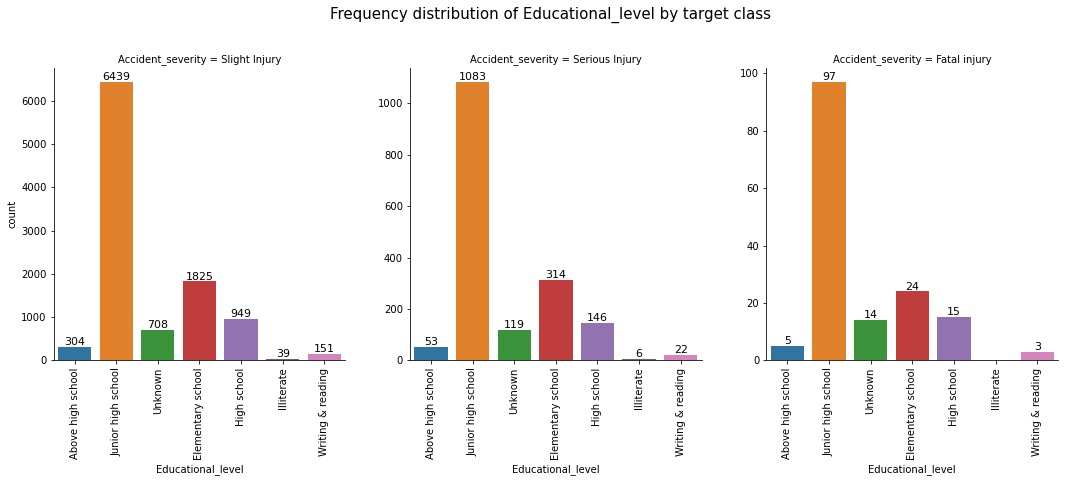

<Figure size 1080x720 with 0 Axes>

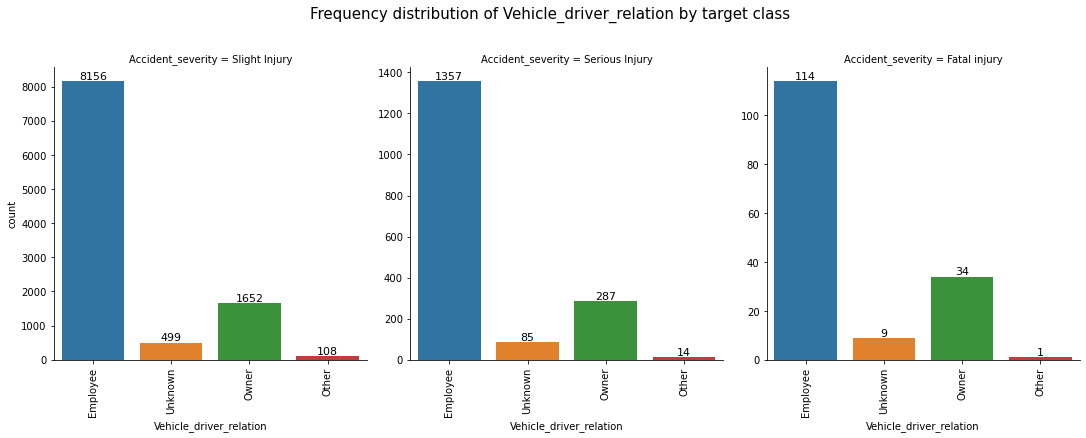

<Figure size 1080x720 with 0 Axes>

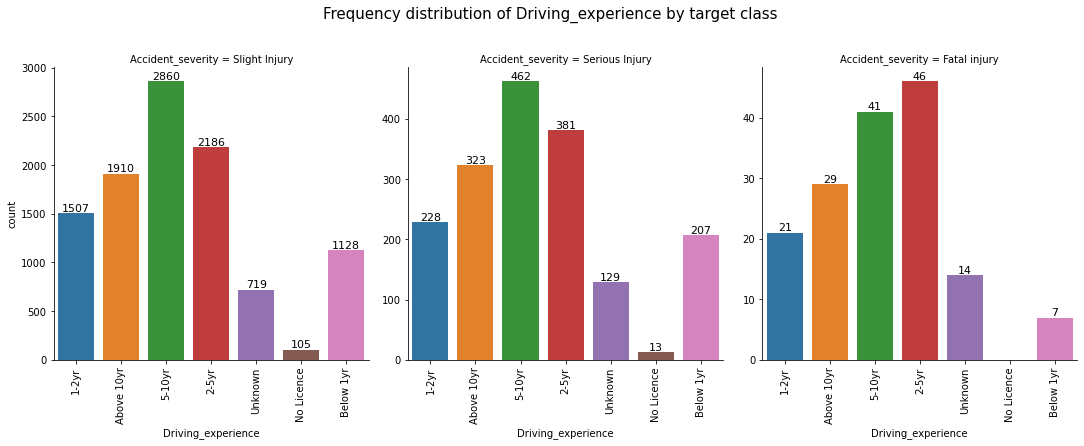

<Figure size 1080x720 with 0 Axes>

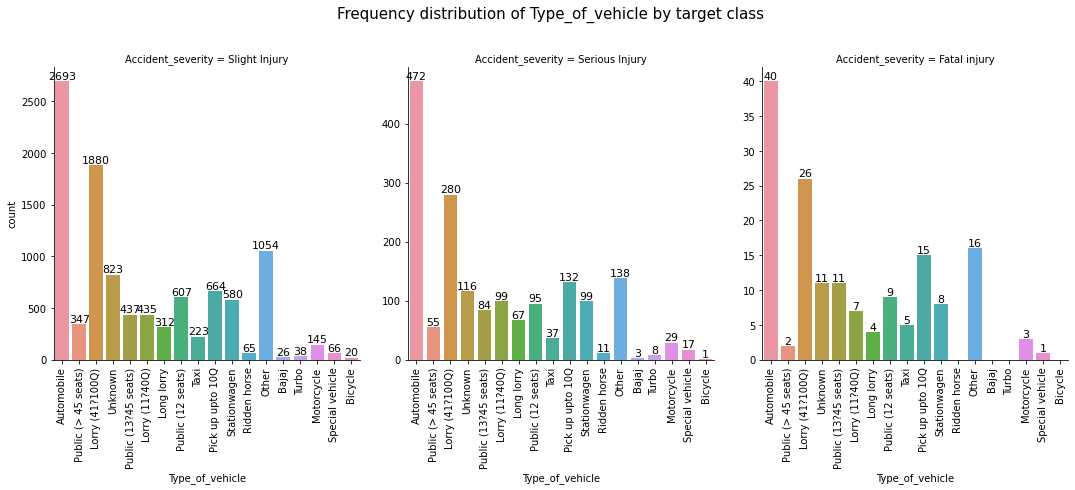

<Figure size 1080x720 with 0 Axes>

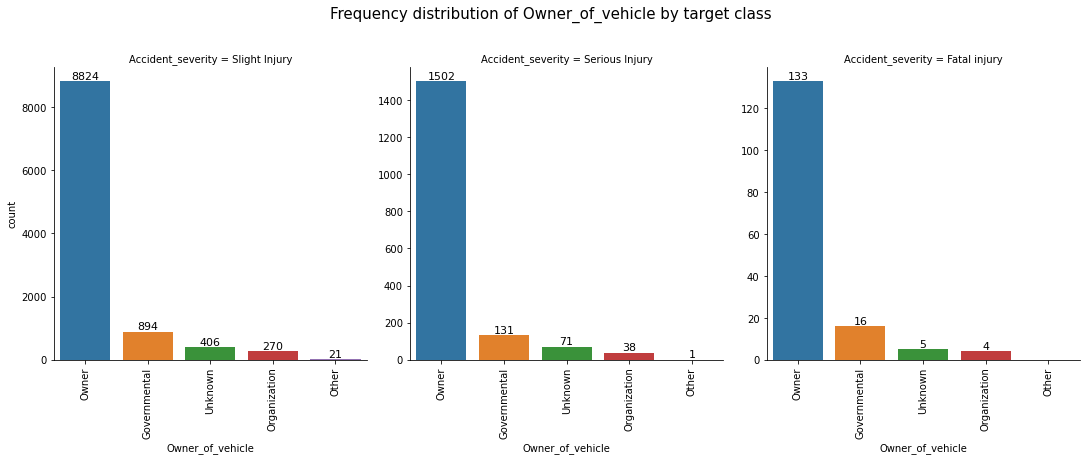

<Figure size 1080x720 with 0 Axes>

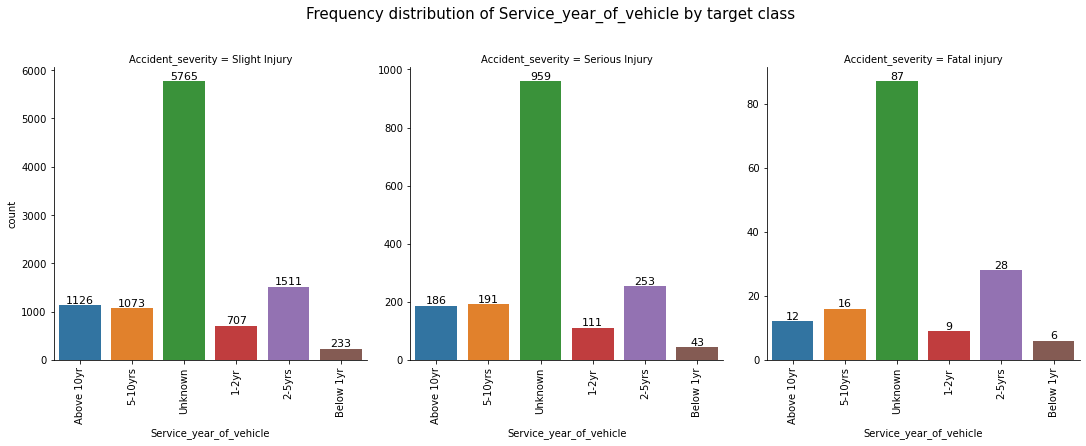

<Figure size 1080x720 with 0 Axes>

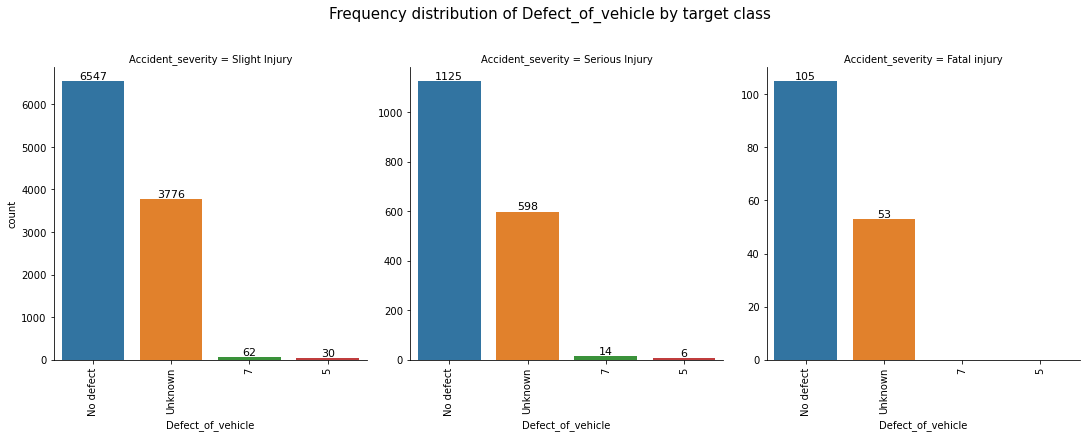

<Figure size 1080x720 with 0 Axes>

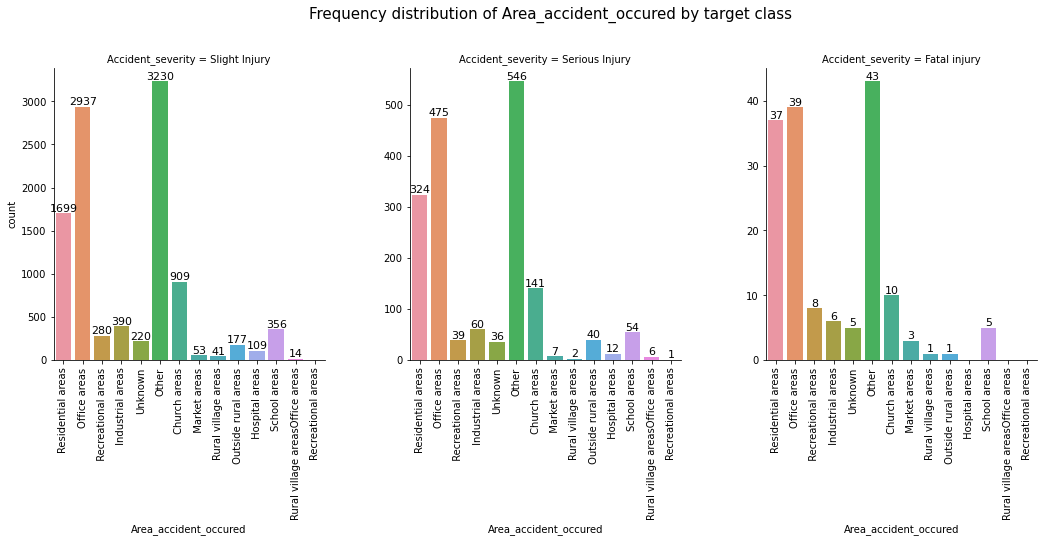

<Figure size 1080x720 with 0 Axes>

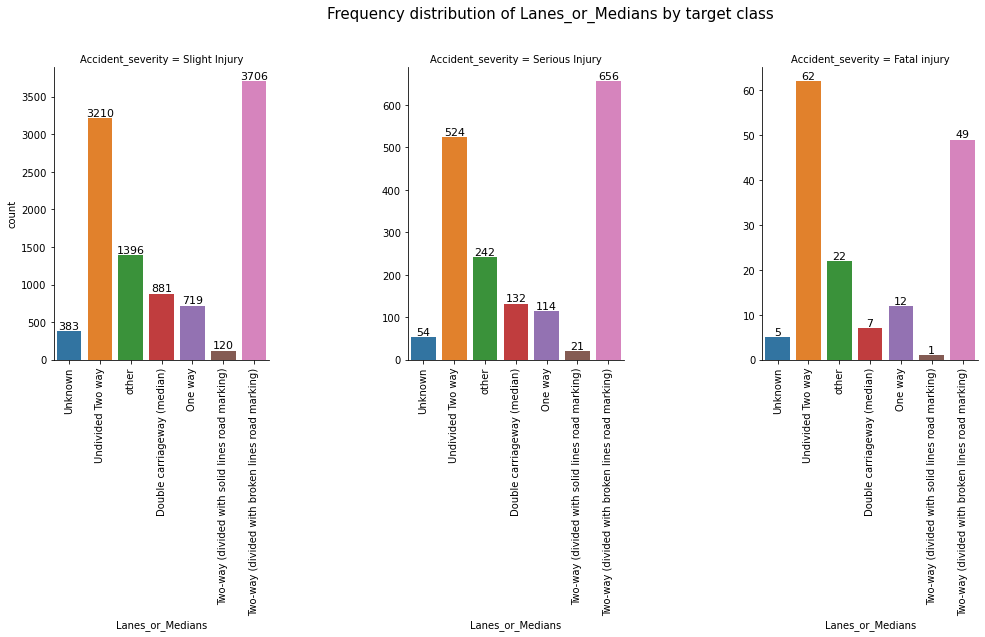

<Figure size 1080x720 with 0 Axes>

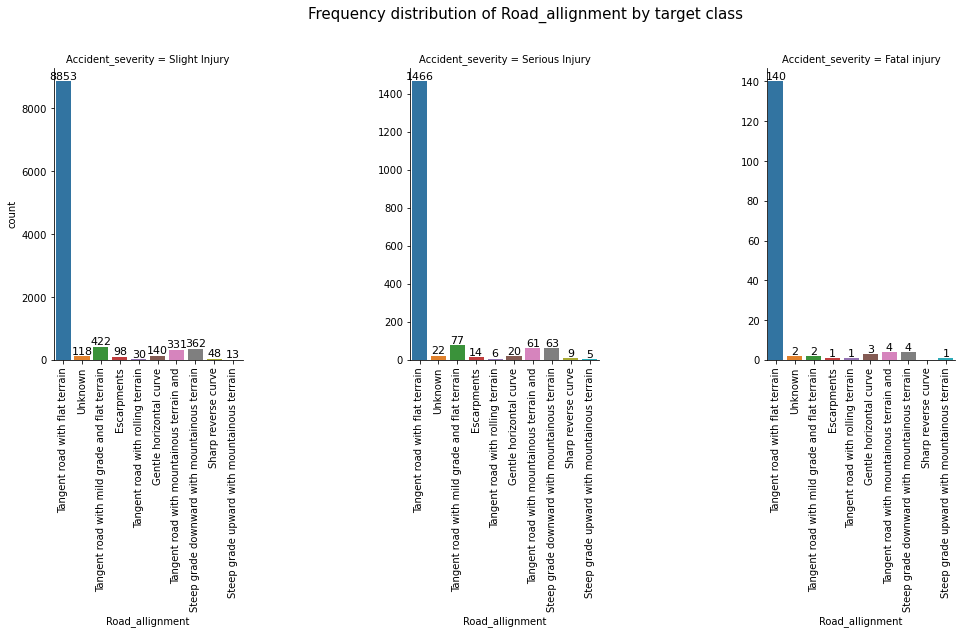

<Figure size 1080x720 with 0 Axes>

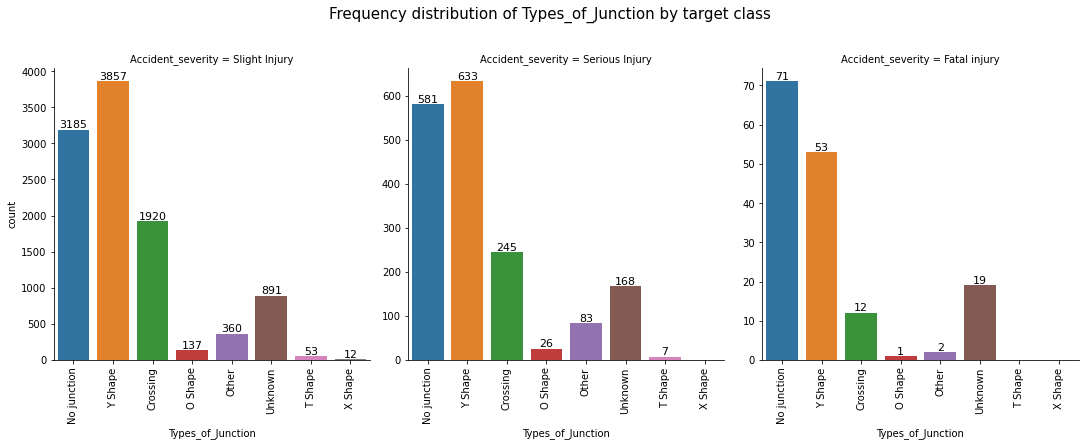

<Figure size 1080x720 with 0 Axes>

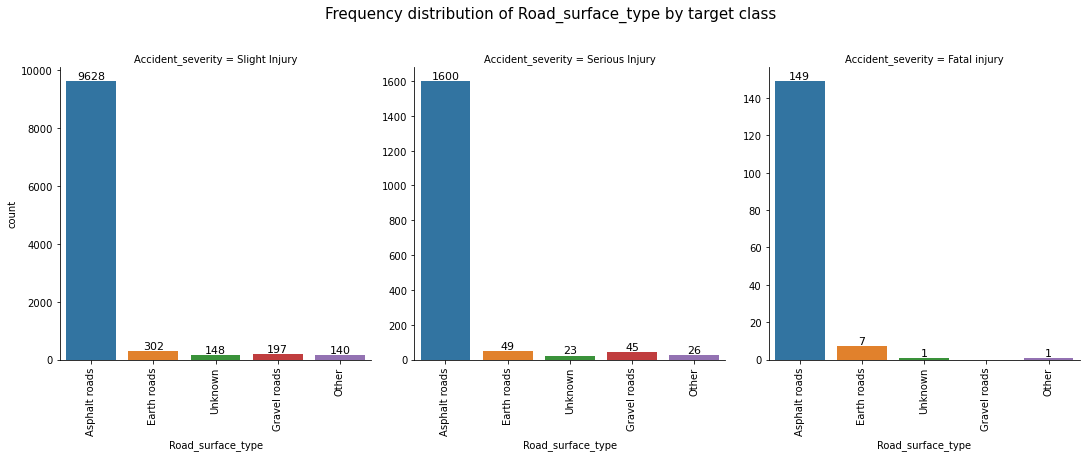

<Figure size 1080x720 with 0 Axes>

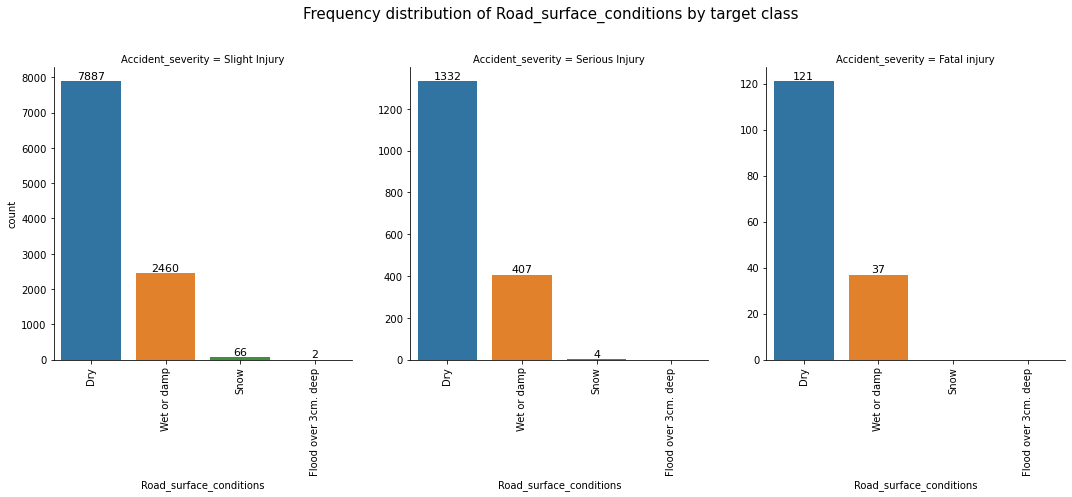

<Figure size 1080x720 with 0 Axes>

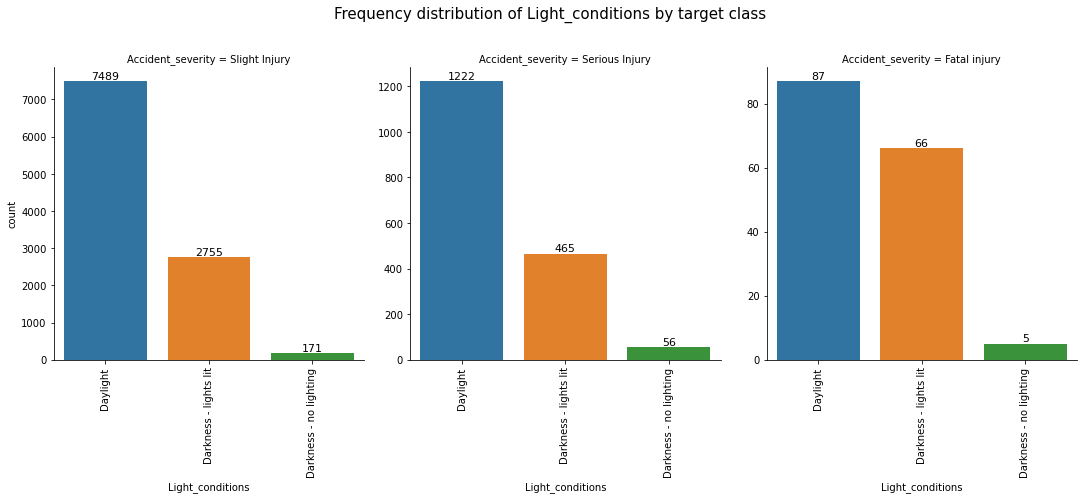

<Figure size 1080x720 with 0 Axes>

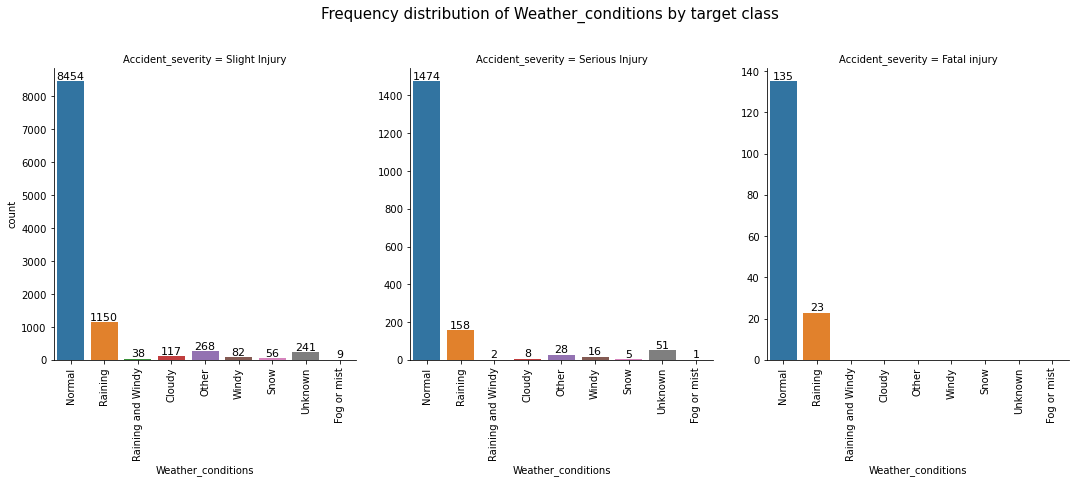

<Figure size 1080x720 with 0 Axes>

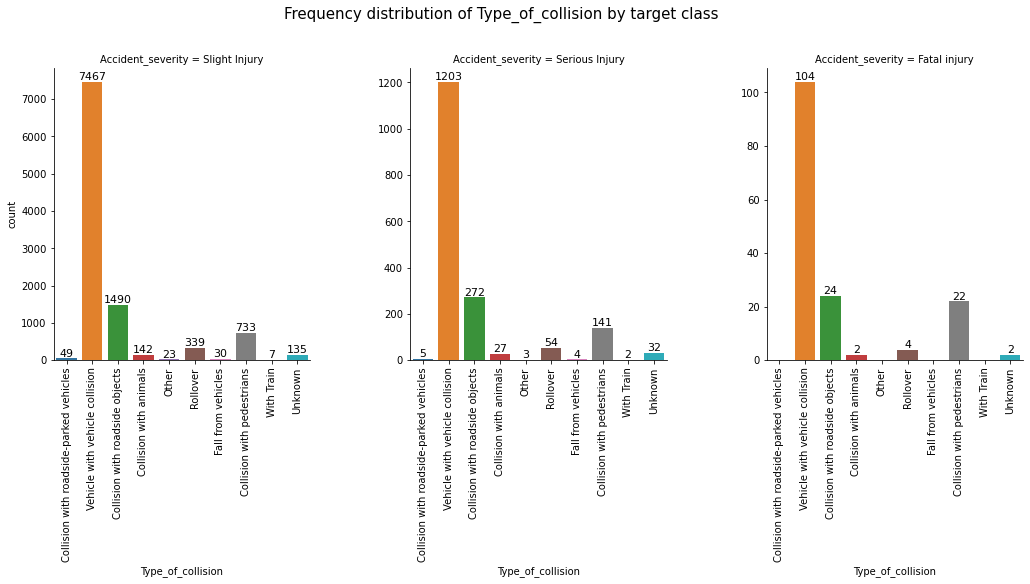

<Figure size 1080x720 with 0 Axes>

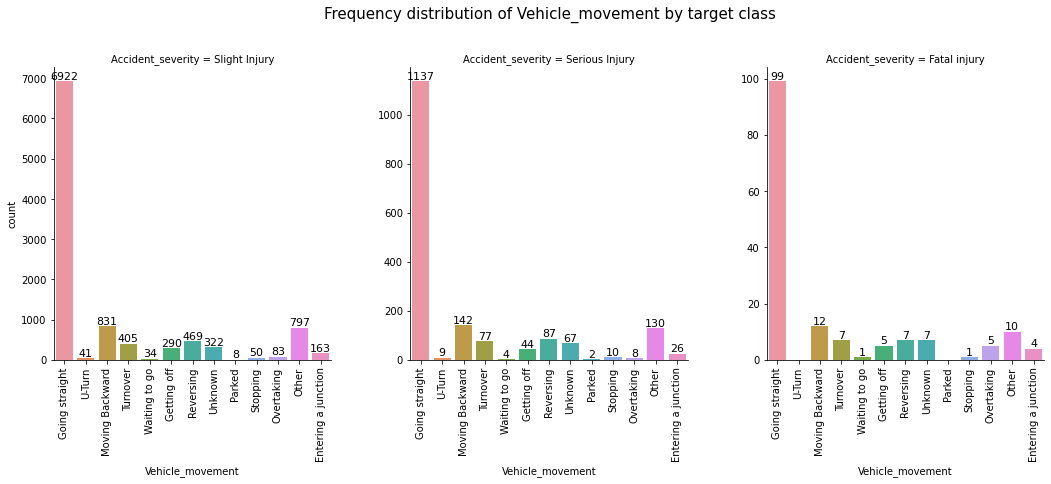

<Figure size 1080x720 with 0 Axes>

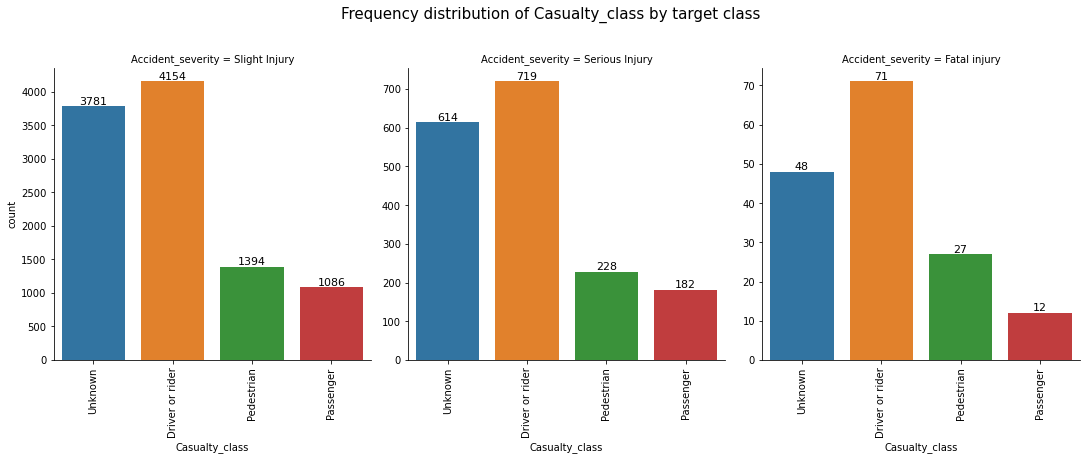

<Figure size 1080x720 with 0 Axes>

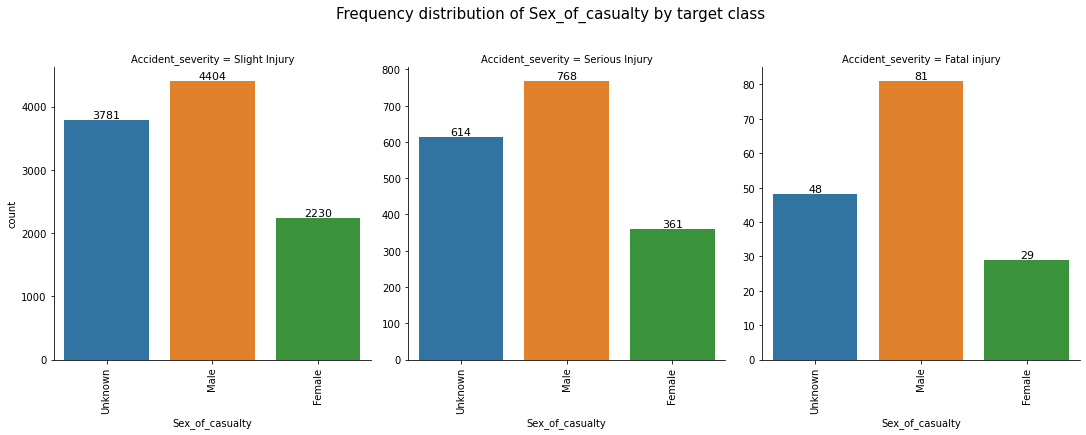

<Figure size 1080x720 with 0 Axes>

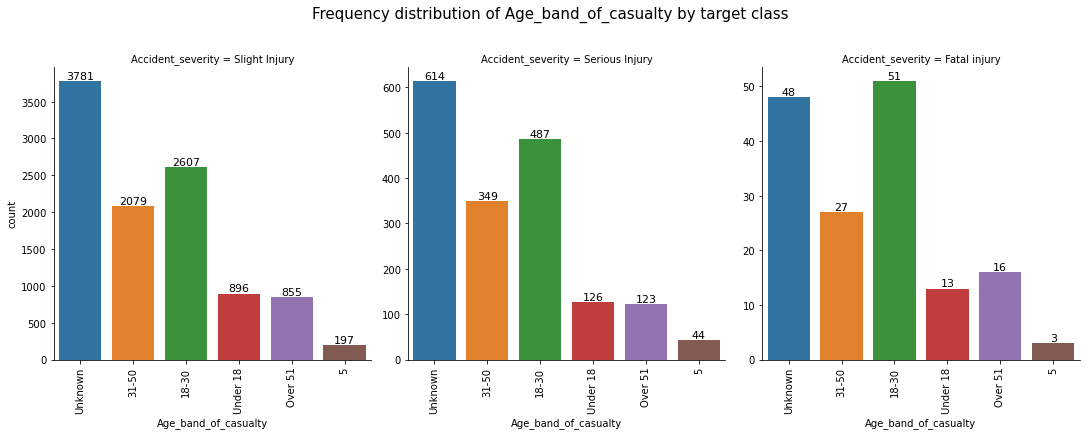

<Figure size 1080x720 with 0 Axes>

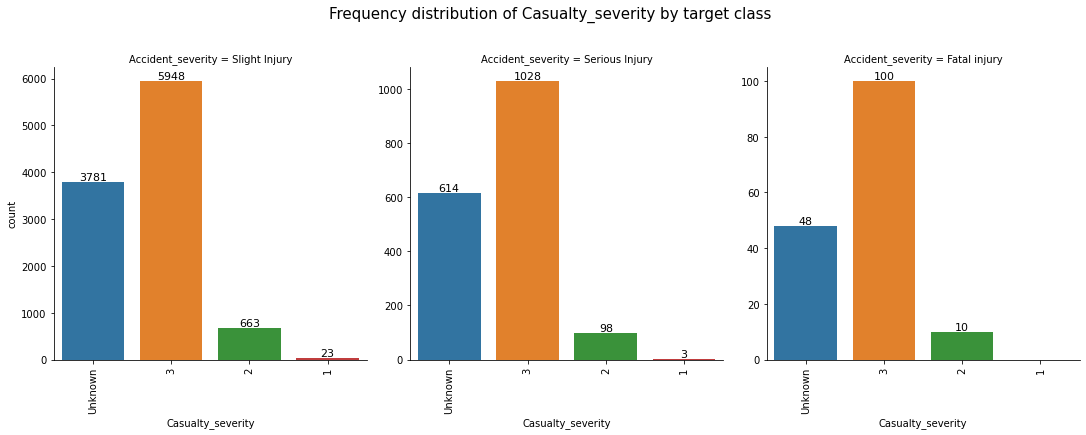

<Figure size 1080x720 with 0 Axes>

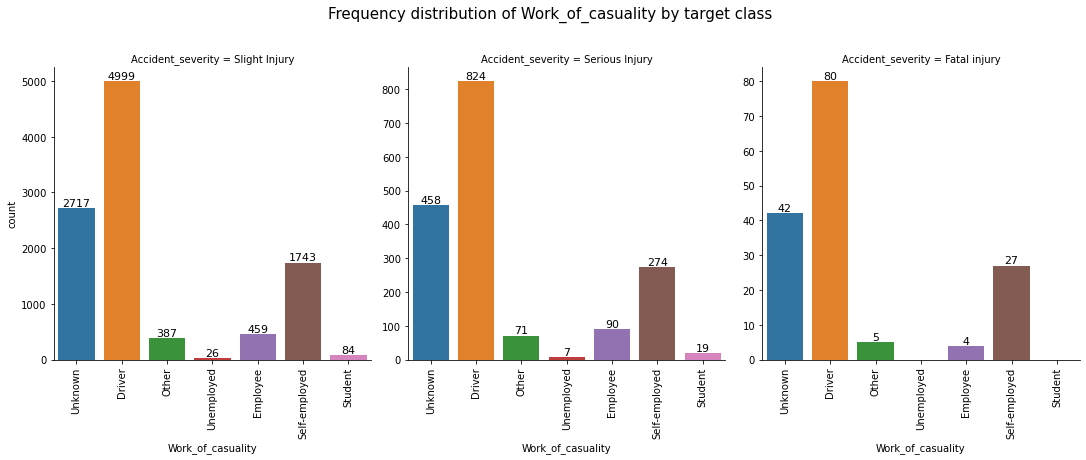

<Figure size 1080x720 with 0 Axes>

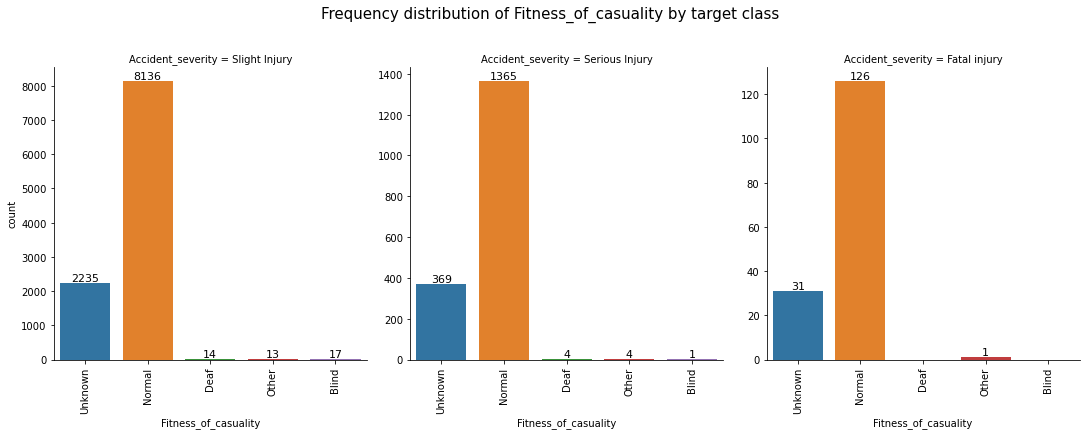

D:\FCAI\ANACONDA\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 1080x720 with 0 Axes>

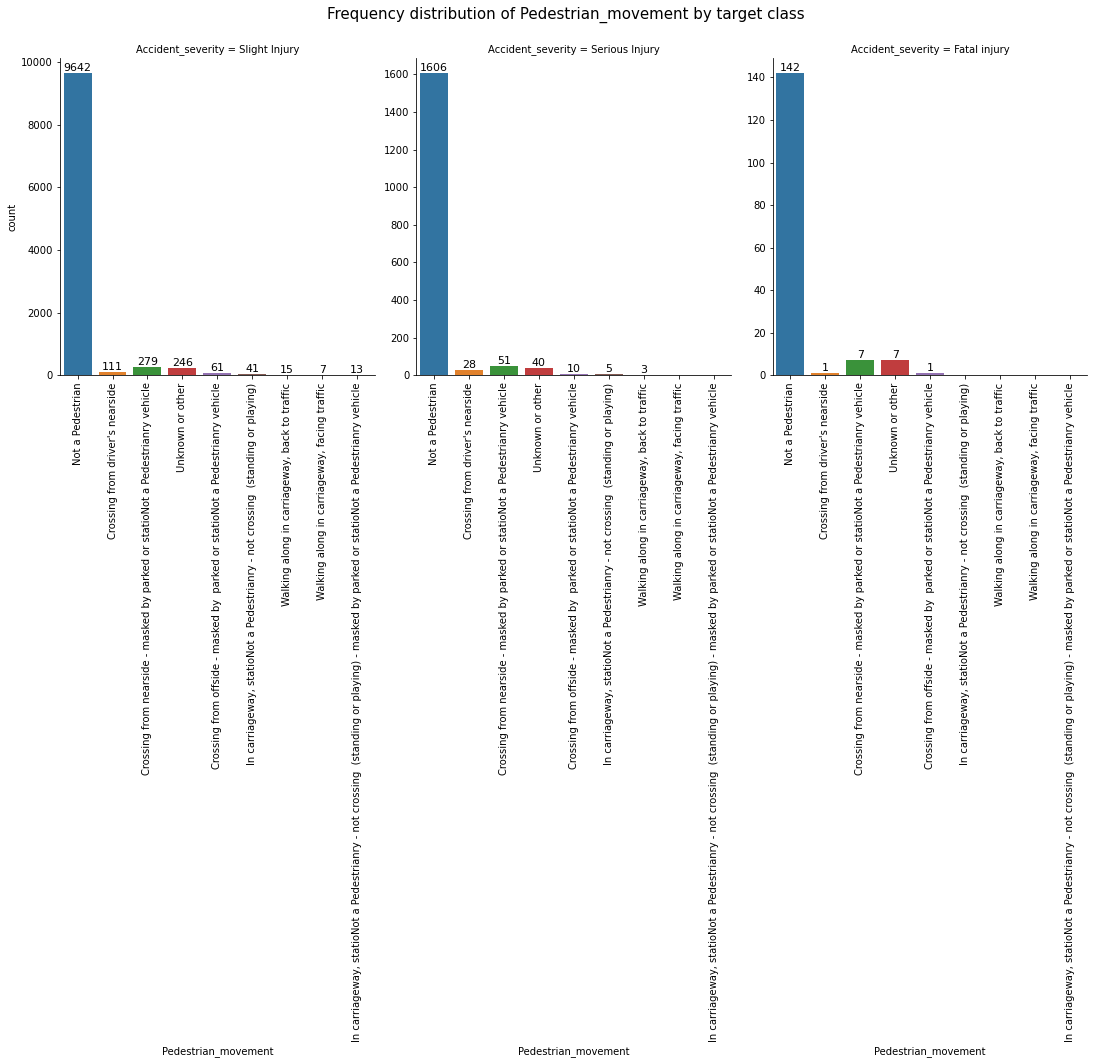

<Figure size 1080x720 with 0 Axes>

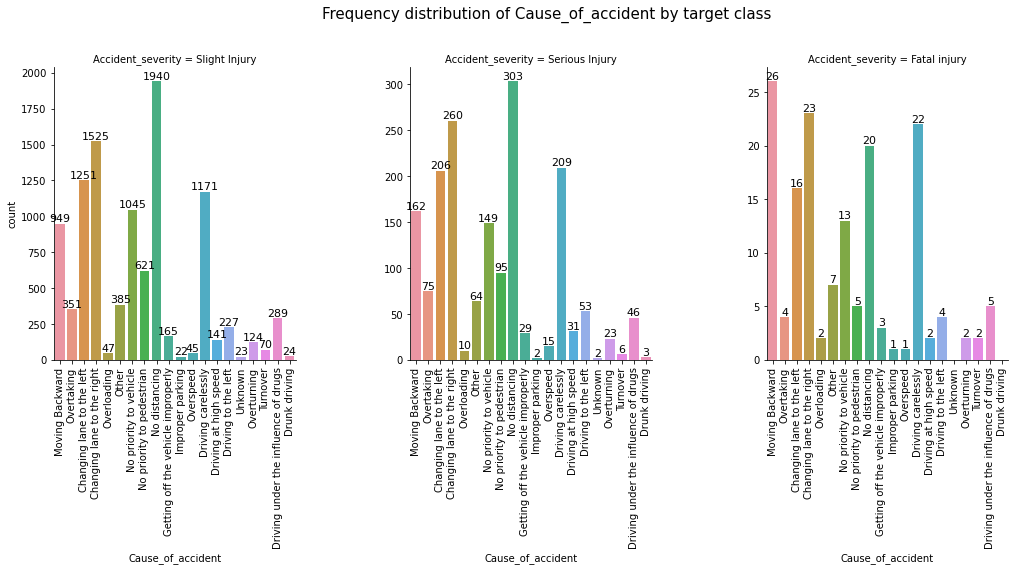

<Figure size 1080x720 with 0 Axes>

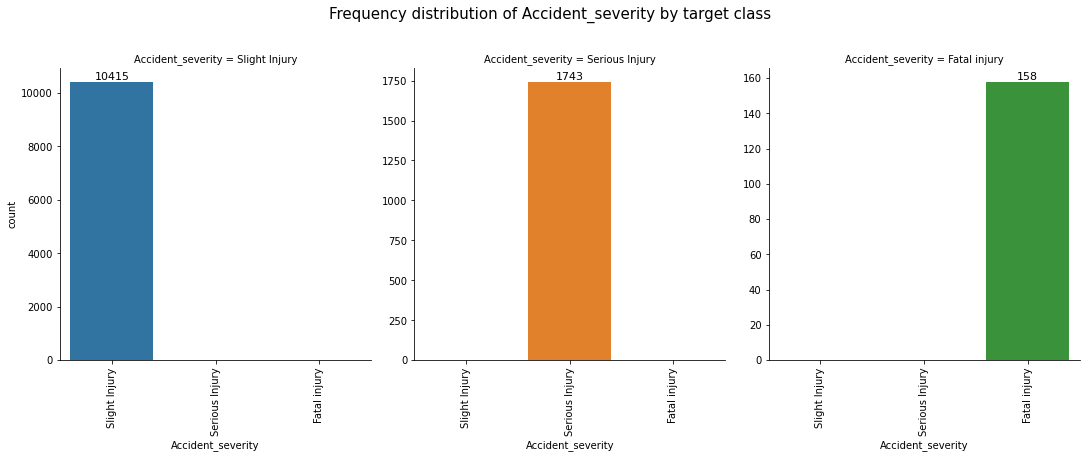

In [25]:
# List columns by data type
categorical_columns = rta.select_dtypes(include=['object']).columns

# Plot categorical features against Accident_severity
for col in categorical_columns:
    plt.figure(figsize=(15, 10))
    catplot = sns.catplot(data=rta, x=col, col='Accident_severity', kind='count', sharey=False)
    catplot.set_xticklabels(rotation=90)
    plt.suptitle(f"Frequency distribution of {col} by target class", y=1.1, fontsize=15)

    # Add labels to the bars using annotate
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Check to avoid NaN and zero values
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', fontsize=11, color='black')

    plt.show()


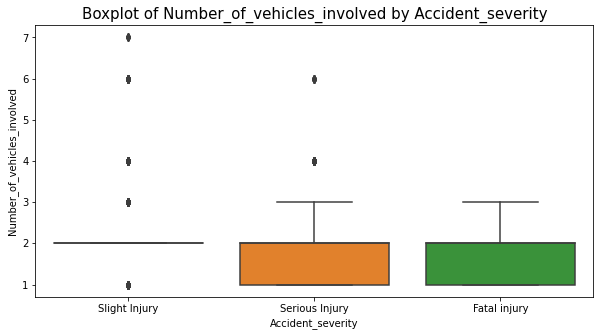

D:\FCAI\ANACONDA\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


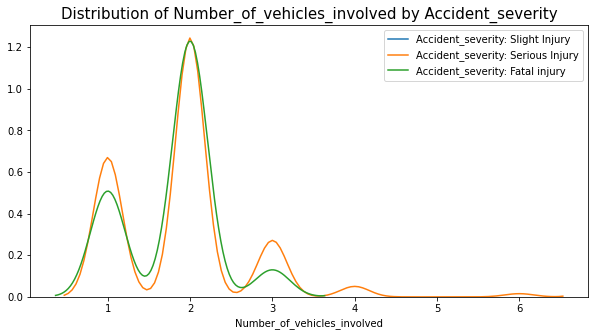

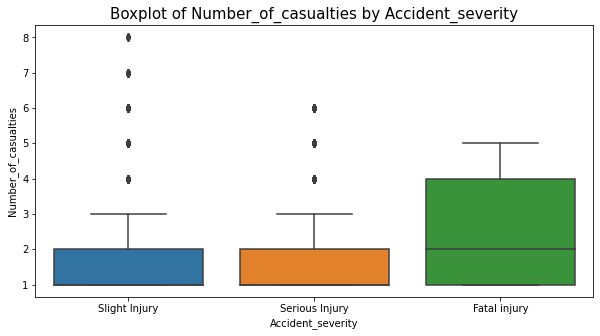

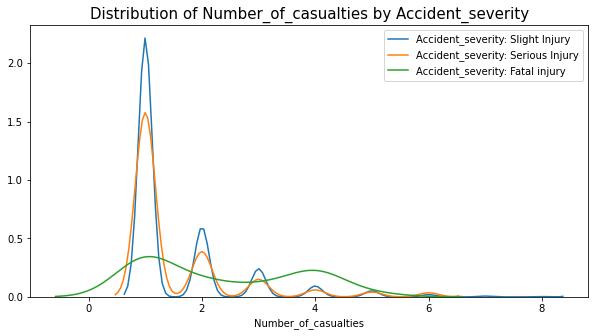

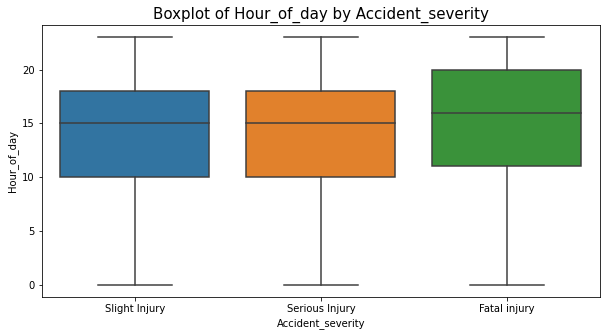

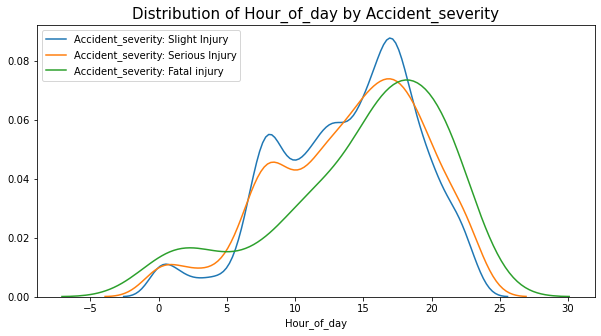

In [26]:
# List numerical columns in the dataset
numerical_columns = rta.select_dtypes(include=['number']).columns

# Plot numerical features using boxplot and distplot against Accident_severity
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=rta, x='Accident_severity', y=col)
    plt.title(f'Boxplot of {col} by Accident_severity', fontsize=15)
    plt.show()

    # Distplot (old version of displot)
    plt.figure(figsize=(10, 5))
    for severity in rta['Accident_severity'].unique():
        sns.distplot(rta[rta['Accident_severity'] == severity][col], hist=False, label=f'Accident_severity: {severity}')
    
    plt.title(f'Distribution of {col} by Accident_severity', fontsize=15)
    plt.legend()
    plt.show()


In [27]:
print("correlation between numeric features")
rta.corr()

correlation between numeric features


,Number_of_vehicles_involved,Number_of_casualties,Hour_of_day
Number_of_vehicles_involved,1.000000,0.213427,0.023095
Number_of_casualties,0.213427,1.000000,0.051761
Hour_of_day,0.023095,0.051761,1.000000


that was not very helpful

# Categorical Data Encoding

In [28]:
numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties','Hour_of_day']
ordinal_cols = ['Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Service_year_of_vehicle', 'Light_conditions', 'Age_band_of_casualty', 'Casualty_severity', 'Accident_severity']
nominal_cols = [x for x in rta.columns if x not in numerical_cols + ordinal_cols]

An appropriate encoding scheme is given as follows:

Ordinal features  → Label encoding
   
Nominal features  → One-hot encoding

numerical features → stay the same

In [29]:
rta.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Driver or rider,Male,31-50,3,Driver,Unknown,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,No defect,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1


In [30]:
label_encoder = LabelEncoder()
for col in ordinal_cols:
    rta[col] = label_encoder.fit_transform(rta[col])

# Encoding nominal features using One-Hot Encoding
rta = pd.get_dummies(rta, columns=nominal_cols, drop_first=True)

# The numerical features remain unchanged, so we don't need to do anything for them

# Now rta contains the encoded features
rta.head()

,Age_band_of_driver,Educational_level,Driving_experience,Service_year_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Accident_severity,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,0,0,3,2,2,2,5,3,2,...,0,0,0,0,0,0,0,0,0,0
1,1,4,3,2,2,2,2,5,3,2,...,0,0,0,0,0,0,1,0,0,0
2,0,4,0,5,2,2,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,5,0,2,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,0,4,1,2,0,2,2,5,3,2,...,0,0,0,0,0,0,1,0,0,0


In [31]:

# Split the DataFrame into features (X_en) and target (y_en)
y_en = rta['Accident_severity']  # Target variable
X_en = rta.drop(columns=['Accident_severity'])  # All other features

# Display the shapes of X_en and y_en to confirm the split
print("Shape of X_en:", X_en.shape)
print("Shape of y_en:", y_en.shape)
X_en.head()

Shape of X_en: (12316, 158)
Shape of y_en: (12316,)


,Age_band_of_driver,Educational_level,Driving_experience,Service_year_of_vehicle,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Hour_of_day,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,0,0,3,2,2,2,5,3,17,...,0,0,0,0,0,0,0,0,0,0
1,1,4,3,2,2,2,2,5,3,17,...,0,0,0,0,0,0,1,0,0,0
2,0,4,0,5,2,2,2,1,2,17,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,5,0,2,2,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,0,4,1,2,0,2,2,5,3,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
from sklearn.feature_selection import SelectKBest, chi2
# Make sure the features are non-negative (required for chi2)
X_en = X_en.clip(lower=0)  # This will replace negative values with 0


# Create the SelectKBest object with chi2
fs = SelectKBest(score_func=chi2, k=50)  
# Fit and transform the data
X_new = fs.fit_transform(X_en, y_en)




# Get the indices of the selected features
selected_indices = fs.get_support(indices=True)

# Get the selected feature names using the indices
selected_features = X_en.columns[selected_indices]
print("Selected Feature Names:")
print(selected_features)



# Display the shape of the new feature set
print("Shape of X_new:", X_new.shape)

Selected Feature Names:
Index(['Age_band_of_driver', 'Driving_experience', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Age_band_of_casualty', 'Hour_of_day', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Sex_of_driver_Unknown',
       'Vehicle_driver_relation_Owner', 'Type_of_vehicle_Long lorry',
       'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Lorry (41?100Q)',
       'Type_of_vehicle_Other', 'Type_of_vehicle_Pick up upto 10Q',
       'Type_of_vehicle_Public (13?45 seats)',
       'Area_accident_occured_  Recreational areas',
       'Area_accident_occured_ Hospital areas',
       'Area_accident_occured_ Outside rural areas',
       'Area_accident_occured_Recreational areas',
       'Area_accident_occured_Residential areas',
       'Area_accident_occured_Rural village areas',
       'Area_accident_occured_Rural village areasOffice areas',
       'Lanes_or_Medians_Undivided Two way',
       'Road_allignm

In [42]:
fs_df = pd.DataFrame(X_new, columns=selected_features)

In [43]:
fs_df

,Age_band_of_driver,Driving_experience,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Hour_of_day,Day_of_week_Monday_1_1,Day_of_week_Saturday_1_1,Day_of_week_Sunday_1_1,...,Sex_of_casualty_Male_1_1,Work_of_casuality_Employee_1_1,Fitness_of_casuality_Other_1_1,Cause_of_accident_Driving to the left_1_1,Cause_of_accident_Moving Backward_1_1,Cause_of_accident_No distancing_1_1,Cause_of_accident_No priority to vehicle_1_1,Cause_of_accident_Overspeed_1_1,Cause_of_accident_Overtaking_1_1,Cause_of_accident_Turnover_1_1
0,0,0,2,2,2,5,17,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,2,2,2,5,17,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,2,2,1,17,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,2,0,2,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,2,2,5,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,2,2,1,5,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12312,4,2,2,2,1,5,18,0,0,1,...,0,0,0,0,0,1,0,0,0,0
12313,2,2,2,1,1,1,13,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12314,0,3,0,2,1,5,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Imablance Data Treatment

In [44]:
categorical_indices = np.arange(3, 50)

smote_nc = SMOTENC(categorical_features=categorical_indices, k_neighbors=10, random_state=42, n_jobs=-1)

X_resampled, y_resampled = smote_nc.fit_resample(fs_df, y_en)

print(X_resampled.shape, y_resampled.shape)

(31245, 50) (31245,)


In [45]:
print(y_resampled.value_counts())

2    10415
1    10415
0    10415
Name: Accident_severity, dtype: int64


# ml model

In [46]:
# train and test split and building baseline model to predict target features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.2, random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2085
           1       0.83      0.81      0.82      2100
           2       0.85      0.85      0.85      2064

    accuracy                           0.87      6249
   macro avg       0.87      0.87      0.87      6249
weighted avg       0.87      0.87      0.87      6249



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2085
           1       0.58      0.61      0.59      2100
           2       0.79      0.74      0.77      2064

    accuracy                           0.69      6249
   macro avg       0.69      0.69      0.69      6249
weighted avg       0.69      0.69      0.69      6249



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2085
    

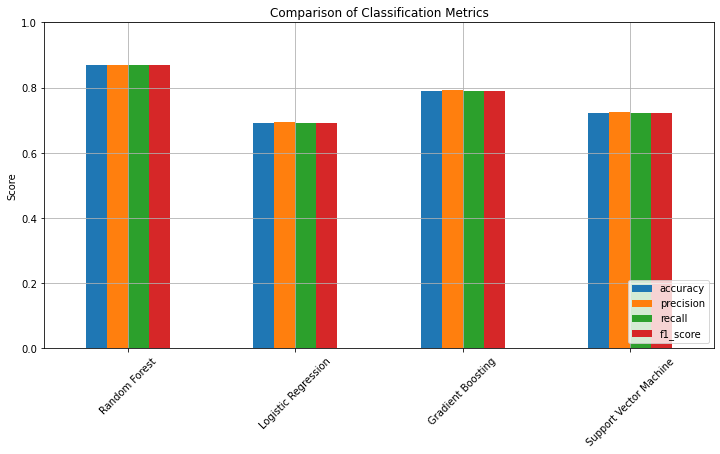

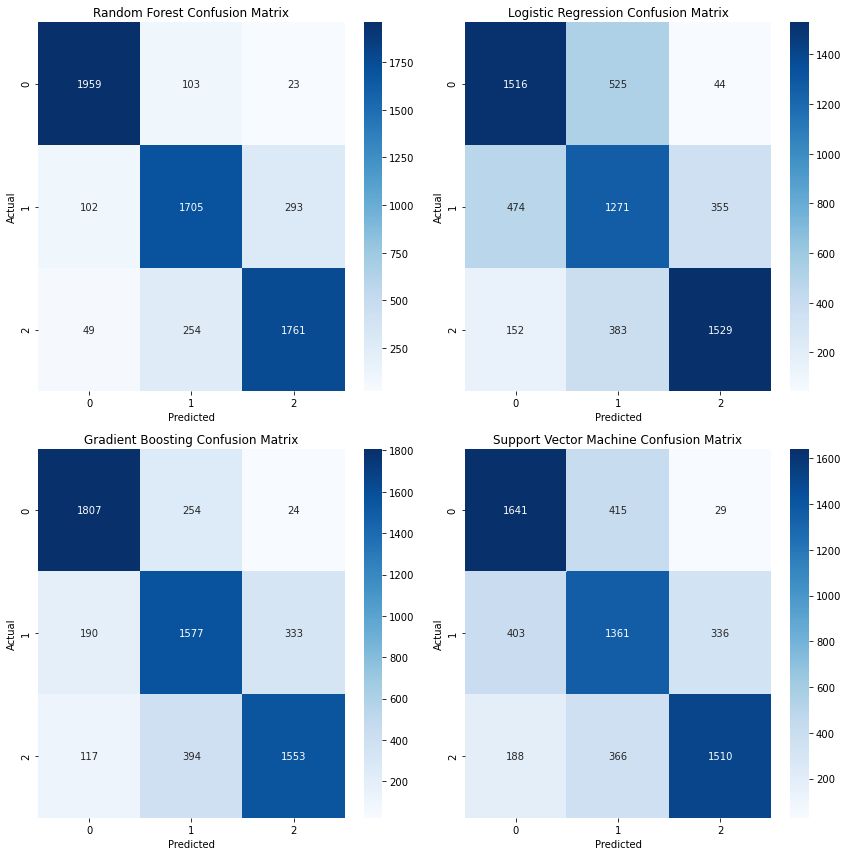

In [50]:
# Initialize models

models = {
    "Random Forest": RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and predict
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Print classification reports for each model
for model_name, metrics in results.items():
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, models[model_name].predict(X_test)))
    print("\n")

# Visualize the results
metrics = ["accuracy", "precision", "recall", "f1_score"]
results_df[metrics].plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Classification Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, (model_name, metrics) in zip(axes.flatten(), results.items()):
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [48]:


# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
# predicting on test data
predics = rf.predict(X_test)

In [49]:
classif_re = classification_report(y_test,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2085
           1       0.83      0.81      0.82      2100
           2       0.85      0.85      0.85      2064

    accuracy                           0.87      6249
   macro avg       0.87      0.87      0.87      6249
weighted avg       0.87      0.87      0.87      6249

